# **Netflix Movies And TV Shows Clustering**

---------------------------------------------

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Team
##### **Team Member 1 - Sachin**
##### **Team Member 2 - Prashant Singh**
##### **Team Member 3 - Jaanhvi Khandelwal**

# **Project Summary -**

Netflix Movies and TV Shows Clustering is a data analysis and machine learning technique used by Netflix to group content into similar categories. This technique analyzes various characteristics of each title, such as genre, cast, and plot, and uses algorithms to identify patterns and similarities. This allows Netflix to provide users with personalized recommendations based on their viewing history and preferences. The goal is to improve user engagement and satisfaction, which translates into improved customer retention and increased company revenue.

Netflix movie and TV show clustering is a data-driven approach that Netflix uses to group its extensive content library into similar categories. This process involves collecting and analyzing various data points such as genre, cast, director, plot, and other relevant characteristics. Netflix then uses unsupervised machine learning algorithms to identify patterns and similarities between different titles.

Algorithms used in this process include clustering techniques such as k-means, hierarchical clustering, and principal component analysis (PCA). These algorithms help Netflix group movies and TV shows with similar features into different groups, each representing a unique genre or category.

The ultimate goal of this clustering is to improve the user's experience on Netflix by providing them with personalized content recommendations based on their viewing history and preferences. By organizing the content library into clusters, Netflix can suggest titles to users that are more likely to match their interests, making it more likely that users will remain engaged with the platform.

Clustering not only improves user satisfaction, but also helps Netflix make data-driven decisions about producing and licensing content. Understanding underlying trends and patterns in user behavior allows Netflix to make informed decisions about which titles to produce or acquire and which titles to remove from the platform. This ultimately helps in customer retention and increased business revenue. 

# **GitHub Link**

# **Problem Statement**



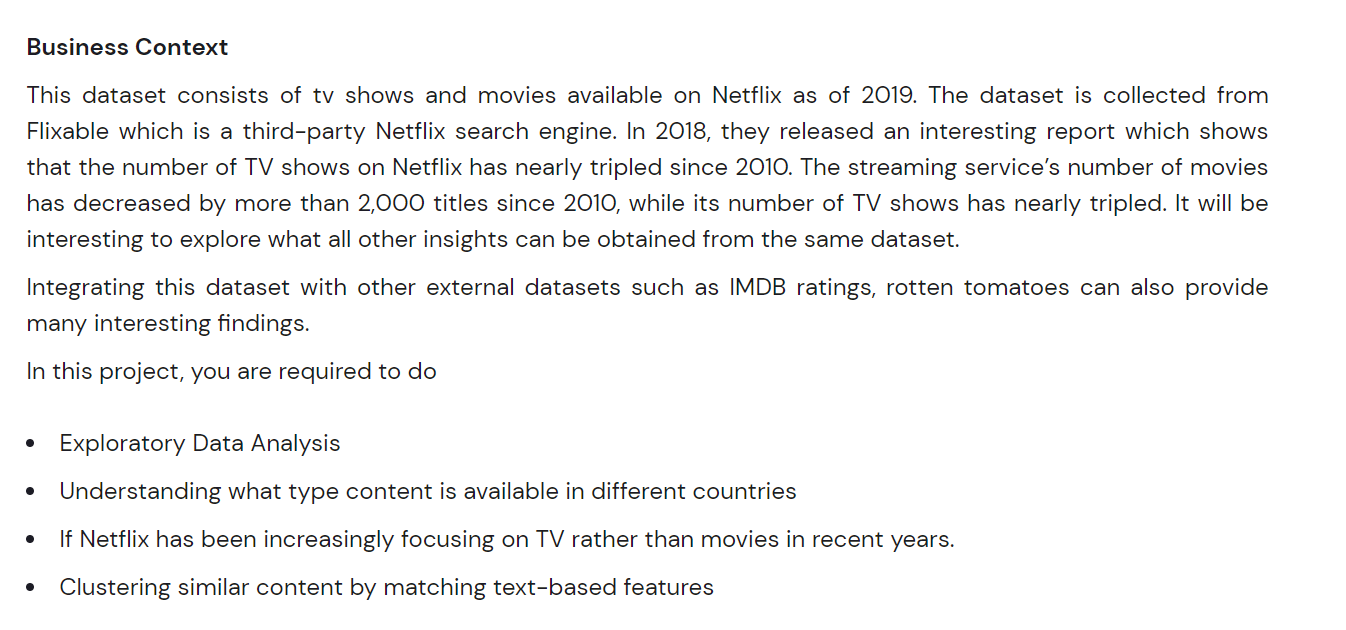

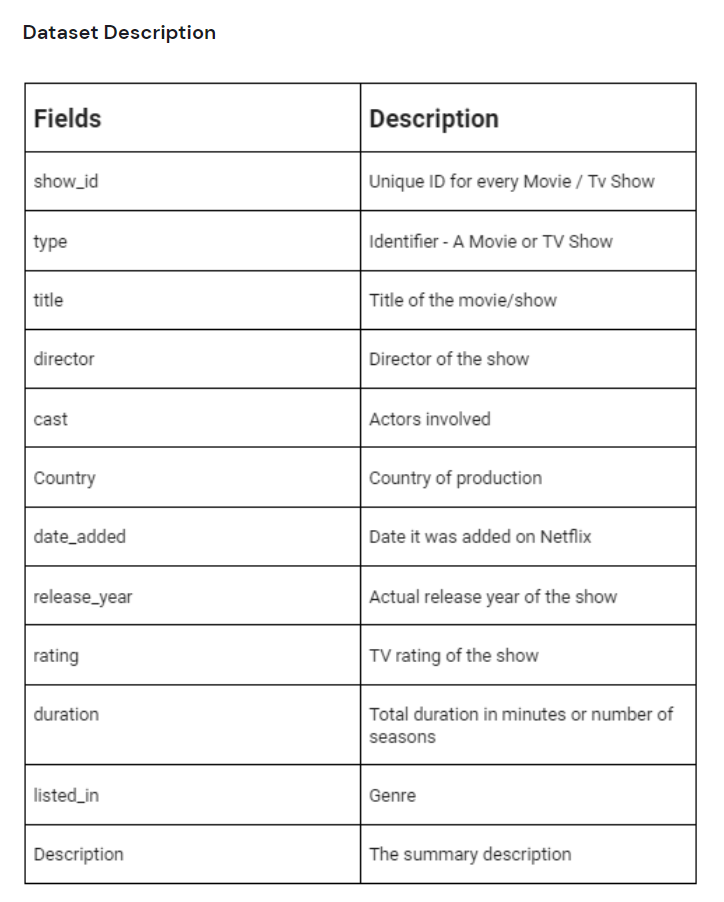

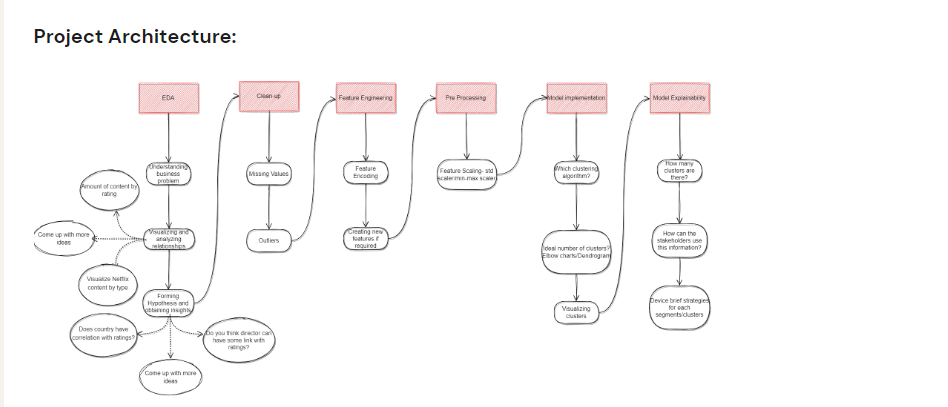

### Importing Necessary Libraries👇🏻

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')


### Loading the given dataset



In [ ]:
# Loading the dataset into variable name netflix_df
netflix_df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Looking the top 5mentries of our dataset
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# counting number of rows and column present in the dataset by using the shape function 
# Rows:- 7787 and column :- 12
netflix_df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Basic info of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<BarContainer object of 12 artists>

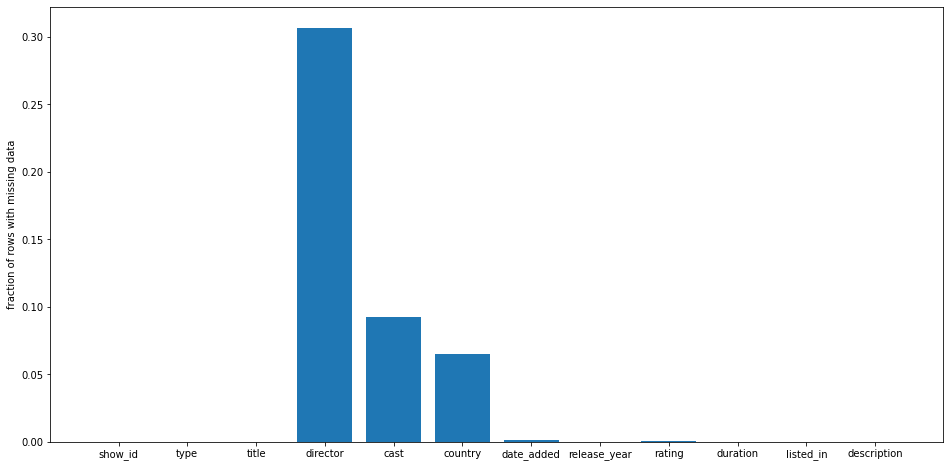

In [ ]:
# null value distribution
null_counts = netflix_df.isnull().sum()/len(netflix_df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='horizontal')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<Axes: >

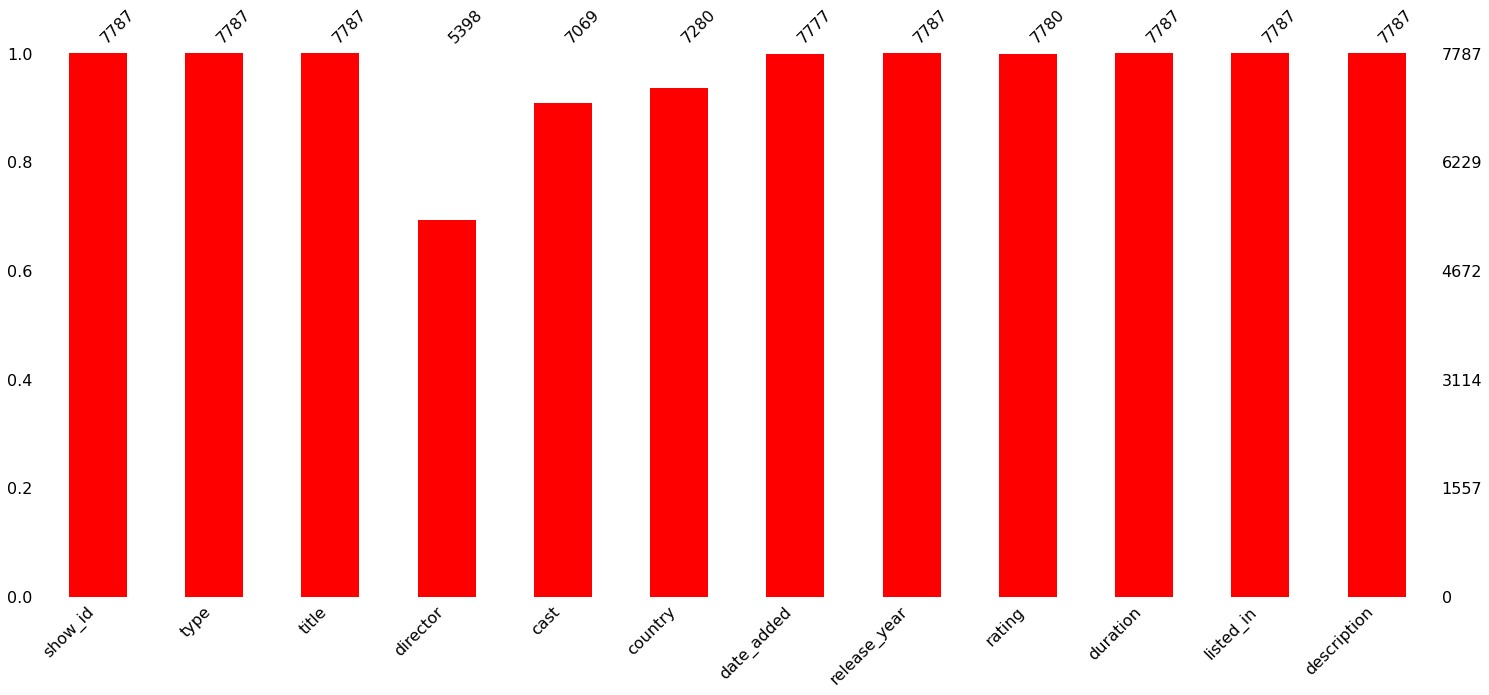

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(netflix_df, color = 'red')

### What did you know about your dataset?

As we can check most of the columns are not having any missing of null value except
- Director (2389)
- Cast (718)
- Country (507)
- Date_added (10)
- Rating (7) 

##  ***Understanding Our Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

Only one column Release_Date is numerical type, rest all are strings. So, Describe is not very useful in this case. 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
netflix_df.show_id.value_counts()

s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64

This shows that every row has a unique Id without any repetation 

In [ ]:
# Counting the values from "Type" column of "Movie and TV Show"
netflix_df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

This shows that the data is divided into two types only. Movies and TV Shows 

In [ ]:
# Counting the values of Column "title"
netflix_df.title.value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

In [ ]:
# Counting the values of column "Director"
netflix_df.director.value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [ ]:
netflix_df['cast'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

In [ ]:
netflix_df['cast'][10]

"Thomas Jane, Molly Parker, Dylan Schmid, Kaitlyn Bernard, Bob Frazer, Brian d'Arcy James, Neal McDonough"

We can check that though cast is a list but it is given as string which we need to change

In [ ]:
# Counting the value of column "country"
netflix_df.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

- We can see that most of the movies or shows are from United States, followed by India, United Kingdom, Japan and South Korea. 

In [ ]:
# Counting the value of column "Year"
netflix_df.release_year.value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

- We can see that most of the moves are release in the recent years, showning that recently Netflix is gaining more popularity, Though it was launched in 1997.
- The platform is also focusing on uploaded the newly launched moveies and shows 

In [ ]:
# Counting the value of column "date_added"
netflix_df.date_added.value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

- We can see that the platform is increasing the addition of contents year by year

In [ ]:
# Counting the value of column "rating"
netflix_df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
# Counting the value of column "Duration"
netflix_df.duration.value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [ ]:
# # Counting the value of column "Listed_in"
netflix_df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [ ]:
netflix_df['listed_in'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
netflix_df.description[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

## ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# converting the cast column into a list
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Finding the Null values and Suming Up them 
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#fillna() is a function in Pandas, a Python library for data analysis, that we used to replace missing (NaN) values in our DataFrame with a specified value.
netflix_df['cast'].fillna('No cast',inplace=True)
netflix_df['country'].fillna(netflix_df['country'].mode()[0],inplace=True)
netflix_df['director'].fillna('', inplace=True)

In [ ]:
#'date_added' and 'rating' contains an lower and not much important portion of the data so we will drop them from our analysis.
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#final cheking of null values present in the dataset
netflix_df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### So as we can check here the null values are replaced and read for EDA and TexT Preprocessing.

# **Exploratory Data Analysis**

#### Chart - 1

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

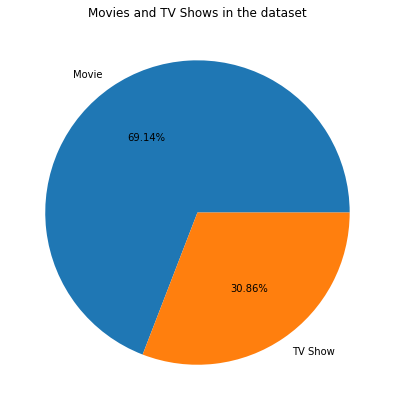

In [ ]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
netflix_df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

- There are only two types, TV shows and movies, so let's see which one has more. 

##### 2. What is/are the insight(s) found from the chart?

In our dataset Movies have more obervations than TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on this insight, Netflix could make informed decisions about the types of content it prioritizes in its programming and marketing efforts. For example, if data suggests that subscribers are more interested in movies than TV shows, Netflix may allocate more resources to acquiring or producing movie content, or promote existing movie content to increase engagement and engagement. It can increase retention rate. 

#### Chart - 2

In [ ]:
# Grouping by the data of column "rating" and "Shoe_id" and reset the index
data_pie = netflix_df.groupby(['rating'])['show_id'].count().reset_index()

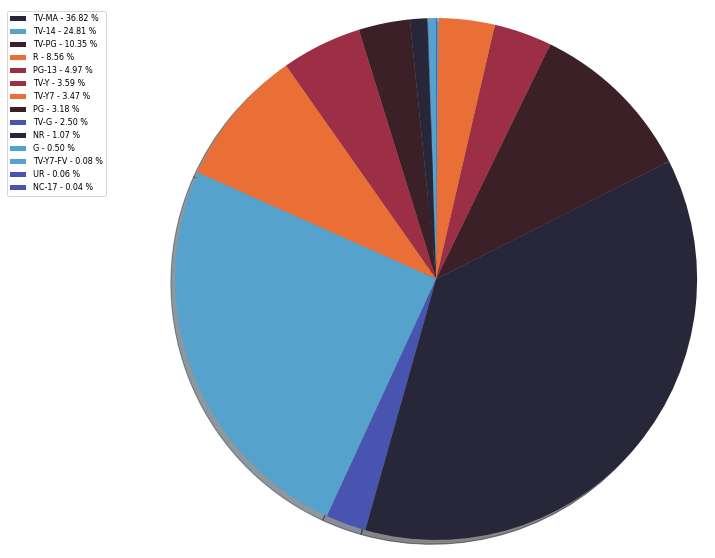

In [ ]:
# In X variable we are listing up the "rating" column values. 
x = np.char.array(list(data_pie['rating'].values))
y = np.array(data_pie['show_id'].values)

# Here we are using the color "icefire"
colors = sns.color_palette('icefire')[0:14]
porcent = 100.*y/y.sum()
plt.figure(figsize = (10, 10))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow= True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')
plt.show()

##### 1. Why did you pick the specific chart?

Ratings are an important aspect for content-based platforms and we want to analyze the different types of ratings and the range of content they contain. 

##### 2. What is/are the insight(s) found from the chart?

* The majority of the rated content on Netflix falls into the TV-MA and TV-14 categories. 
* The high share of TV-MA and TV-14 rated content suggests that there is a significant audience for mature and teen-oriented content.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Advertisers can use this data to more effectively target their ads to their intended audience. Advertisers can use this data to more accurately plan and target their campaigns, as different reviews may reflect different demographics. 

#### Chart - 3

In [ ]:
# Chart - 3 - creating dataframe
data_release_year = netflix_df.groupby(['release_year','type'])['show_id'].count().reset_index()
data_release_year

release_year     type  show_id
0            1925  TV Show        1
1            1942    Movie        2
2            1943    Movie        3
3            1944    Movie        3
4            1945    Movie        3
..            ...      ...      ...
113          2019  TV Show      414
114          2020    Movie      411
115          2020  TV Show      457
116          2021    Movie       12
117          2021  TV Show       19

[118 rows x 3 columns]

<Axes: xlabel='release_year', ylabel='show_id'>

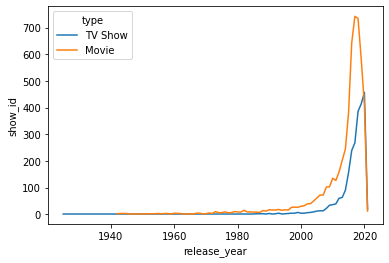

In [ ]:
# creating Visualisation 
sns.lineplot(data = data_release_year, x= 'release_year', y = 'show_id', hue = 'type')

##### 1. Why did you pick the specific chart?

We used this plot to check the distribution of TV shows and movies across years.
Line plots are a useful tool for analyzing trends and patterns over time, especially when dealing with data across different years.

##### 2. What is/are the insight(s) found from the chart?

* The takeaway is that the number of TV shows and movies on Netflix has increased significantly since 2010.
*The significant increase in the number of TV shows and movies on Netflix since 2010 may reflect the evolution of the streaming industry. As more consumers move away from traditional cable and satellite TV, the demand for on-demand streaming services is growing. Netflix is ​​responding to this trend by investing in its content library and expanding its service to attract more subscribers.
* Netflix is ​​known for its data-driven approach to decision making. The increase in the number of TV shows and movies on Netflix's platform may reflect the company's use of data to determine consumer tastes and trends. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding audience preferences and trends, Netflix can continue to build a content library that meets subscriber needs and preferences. This can lead to a better overall customer experience, increased customer satisfaction, higher retention rates and increased revenue.

*Building a robust and diverse content library gives Netflix a competitive advantage over its streaming industry peers. This can help you attract more subscribers, grow your market share, and contribute to the overall success of your business. 

#### Chart - 4

Text(0.5, 1.0, 'Top 10 genres')

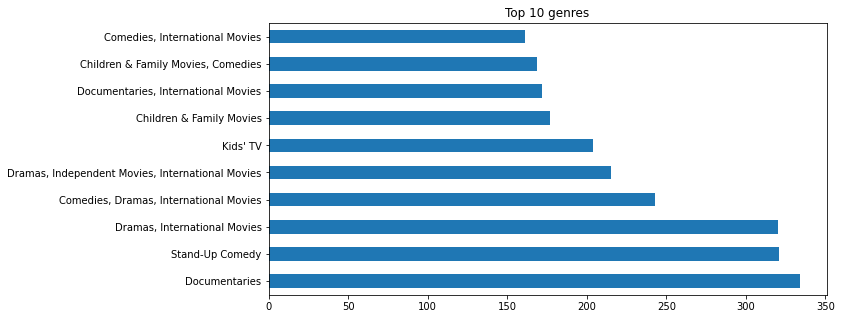

In [ ]:
# Top 10 Genre in movies
# Top 10 genres 
plt.figure(figsize=(10,5))
netflix_df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

##### 1. Why did you pick the specific chart?

Bar plots are used to visualize and compare categorical data. We used bar plot to plot the average count of all the genres in our dataset. 

##### 2. What is/are the insight(s) found from the chart?

Documentaries, Stand-up Comedy, Drama, International movies and comedies are some of the highly popular content on the platform. the reason being people use ott platforms as the source of entertainment and they often love the content that is more relatable to their life and feel real.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could help Netflix make informed decisions about its content acquisition and production strategy. By understanding the popularity of different genres among subscribers, Netflix can build a more diverse and engaging content library that meets viewer needs and preferences. This helps drive subscriber growth, increase engagement, and create a competitive advantage in the streaming industry. 

#### Chart - 5

In [ ]:
# Grouping the "Duraton" column and "Show_id" and sorting the values in Descending Order and Reseting the index 
df_duration = netflix_df.groupby(['duration'])['show_id'].count().sort_values(ascending= False).reset_index()
df_duration

duration  show_id
0     1 Season     1606
1    2 Seasons      378
2    3 Seasons      183
3       90 min      136
4       93 min      131
..         ...      ...
211    196 min        1
212    194 min        1
213    193 min        1
214     43 min        1
215    204 min        1

[216 rows x 2 columns]

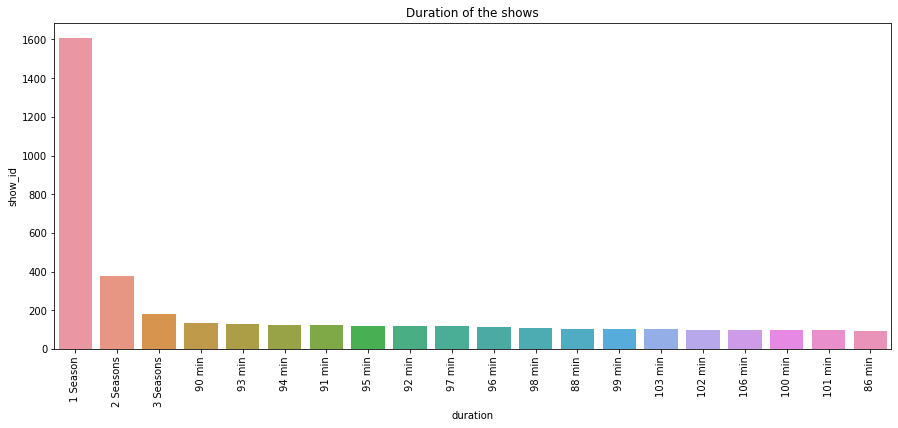

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize = (15, 6))
sns.barplot(data = df_duration, x = df_duration['duration'][:20], y = df_duration['show_id'])
plt.title('Duration of the shows')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot here is used to plot the duration vs show-id count

##### 2. What is/are the insight(s) found from the chart?

*It can be seen that the largest amount of content in the data refers to Season 1, where a platform-produced TV show, film, or web series is at least one season long.
* The fact that "Season 1" is the most common time period for TV shows on Netflix means that streaming services typically organize original shows into seasons rather than releasing episodes individually or in small batches. It suggests that
* The fact that "Season 1" is the most common length of TV shows on Netflix means that viewers are more likely to watch new shows when they first release rather than wait for the next season to be released. It may indicate the most likely. This may be due to the marketing and promotional efforts Netflix puts into new shows, or the fact that viewers are more likely to be interested in shows when they are first released. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights may help guide Netflix's content acquisition and production strategy. By understanding viewers' watch-time preferences, Netflix is ​​well informed about how it structures and publishes original content, and how it allocates resources to produce content that resonates with viewers. you can make informed decisions. 

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
df_country = netflix_df.groupby(['country', 'type'])['show_id'].count().sort_values(ascending = False).reset_index()
df_country

country     type  show_id
0                                        United States    Movie     2076
1                                        United States  TV Show      975
2                                                India    Movie      852
3                                       United Kingdom  TV Show      203
4                                       United Kingdom    Movie      193
..                                                 ...      ...      ...
768                           Indonesia, United States    Movie        1
769                                       Iran, France    Movie        1
770                                    Ireland, Canada    Movie        1
771  Ireland, Canada, Luxembourg, United States, Un...    Movie        1
772                                           Zimbabwe    Movie        1

[773 rows x 3 columns]

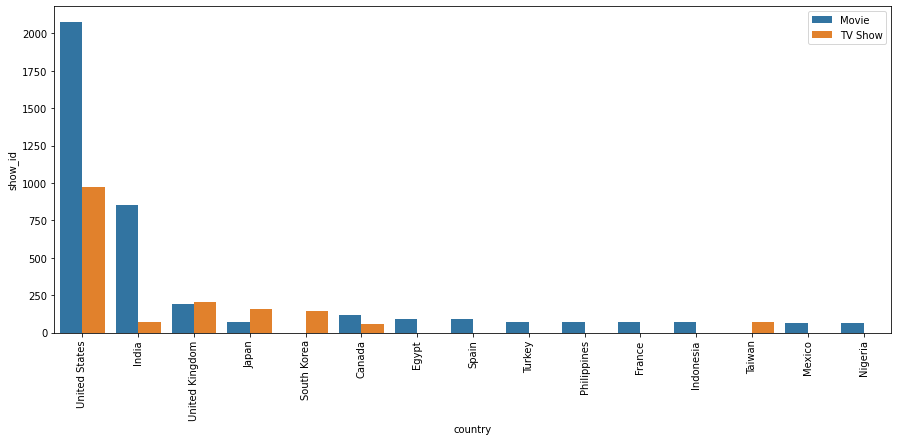

In [ ]:
# Visualizing the code by using th Barplot where X we have taken Country and Y We have taken Show_ID of type movies and TV Show 
plt.figure(figsize = (15, 6))
sns.barplot(data = df_country, x = df_country['country'][:20], y = df_country['show_id'], hue = 'type')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Here we are doing Bivariate analysis using bar plot to compare the number of movies and TV shows produced by different countries. Bivariate analysis bar plots are used to compare the relationship between two categorical variables.

##### 2. What is/are the insight(s) found from the chart?

The United States and India are the major countries producing content through the platform.

* The United States and India have very different cultural identities, so the large amount of films and TV shows produced in these countries means that their culture and values ​​are widely spread and viewed worldwide. It may indicate that you are loved by someone.
* The fact that the United States and India are major producers of movies and TV shows may indicate that these markets are more attractive for investment in the industry. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The dominance of the USA and India in the movie and TV show production industry is an important insight for the industry as it can help inform business decisions related to production, distribution, and marketing.

#### Chart - 7

<Figure size 1008x576 with 0 Axes>

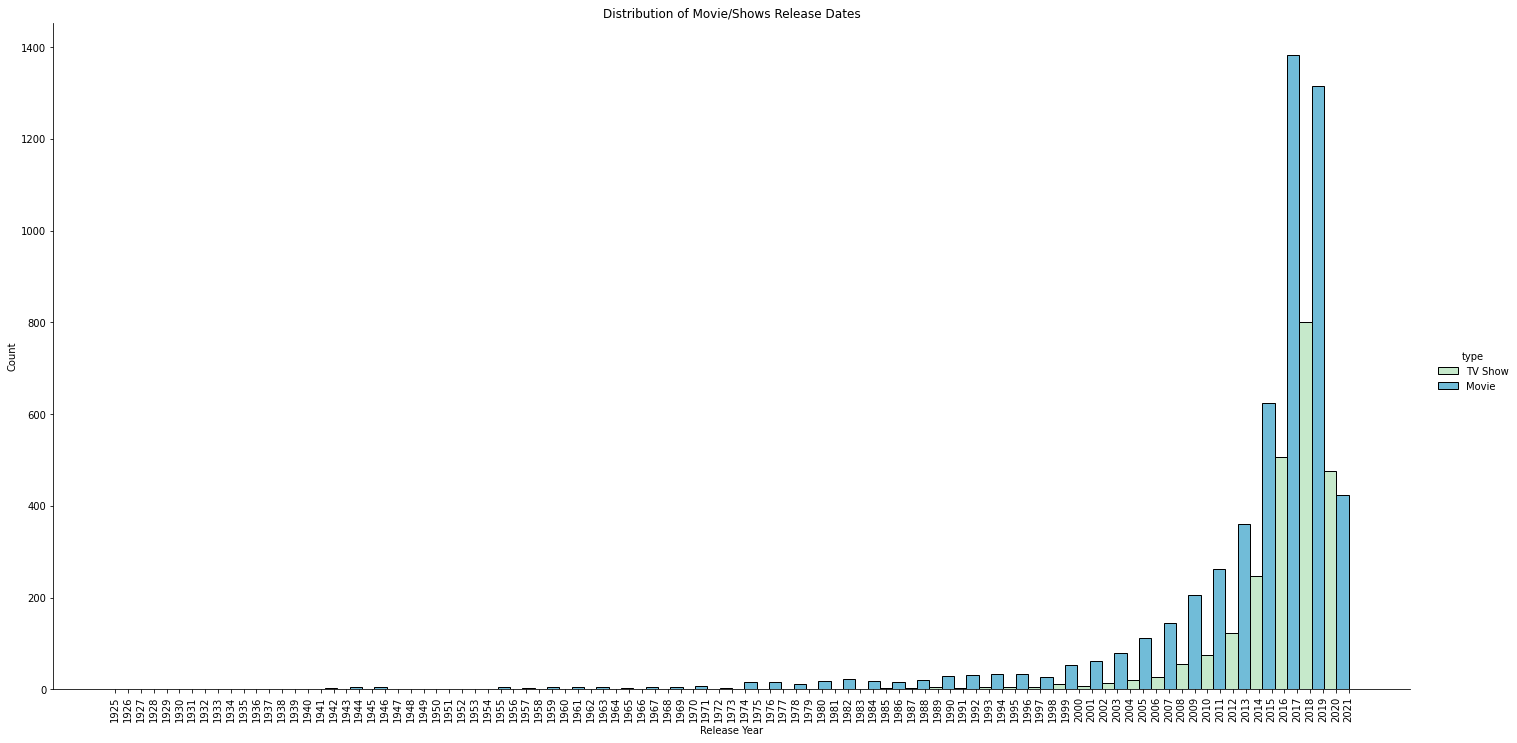

In [ ]:
# # Chart - 7 visualization code by using the Displot 
a = plt.figure(figsize=(14,8))
a = sns.displot(x='release_year', hue = 'type', data = netflix_df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(netflix_df.release_year.min(),netflix_df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')


##### 1. Why did you pick the specific chart?

We picked histogram to visualize the concentration of movie and TV show releases over time, showing when the number of releases began to increase and decrease.

##### 2. What is/are the insight(s) found from the chart?

* Since 2010, the content on the platform has grown rapidly.
* 2017 is the maximum release number of movies, 2018 is the maximum release number of TV shows.
* Maximum content will be released or added to the platform between 2017 and 2019. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could be useful for understanding the growth trajectory of Netflix and for making informed decisions related to content strategy and marketing efforts.

#### Chart - 8

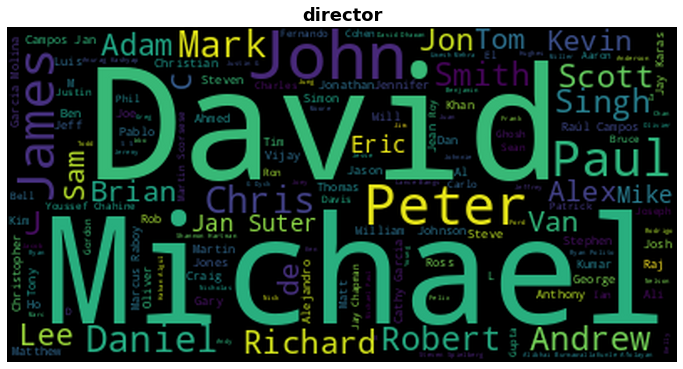

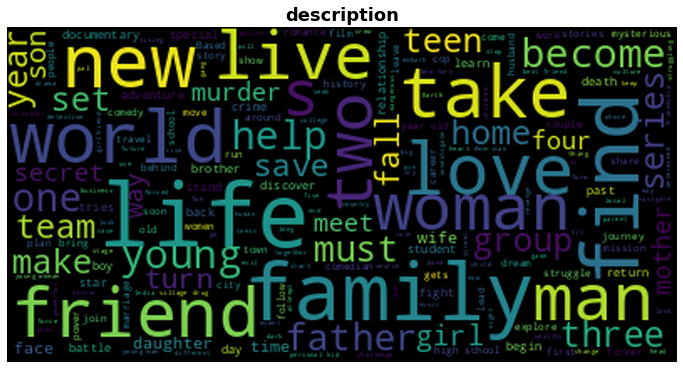

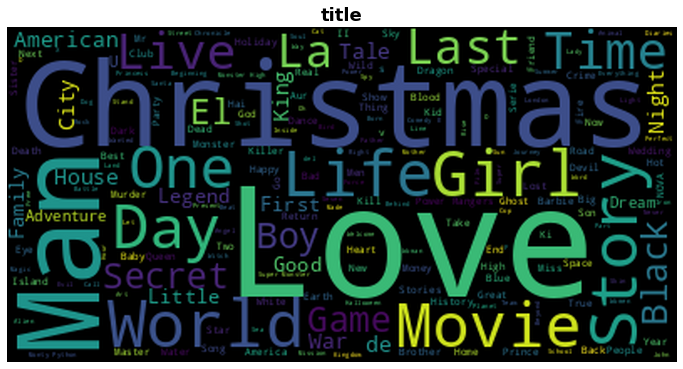

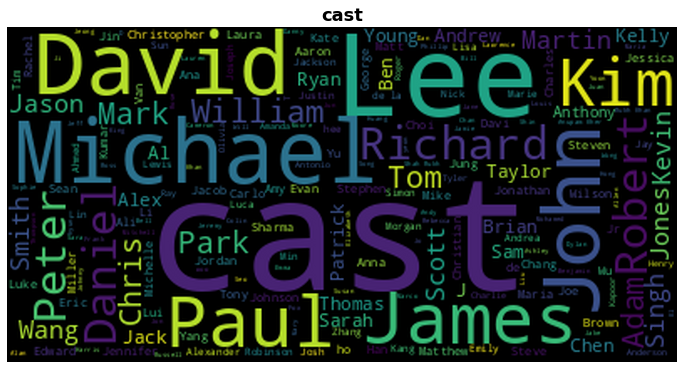

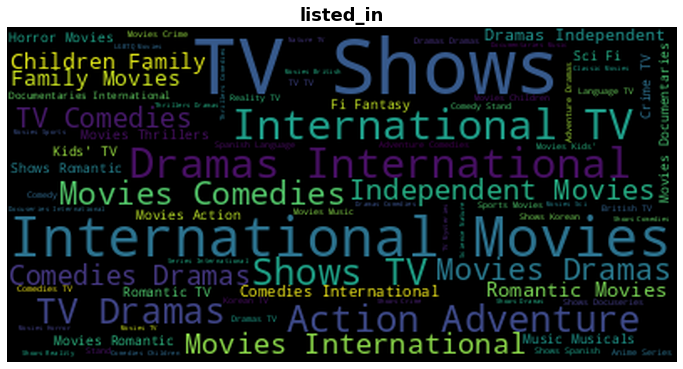

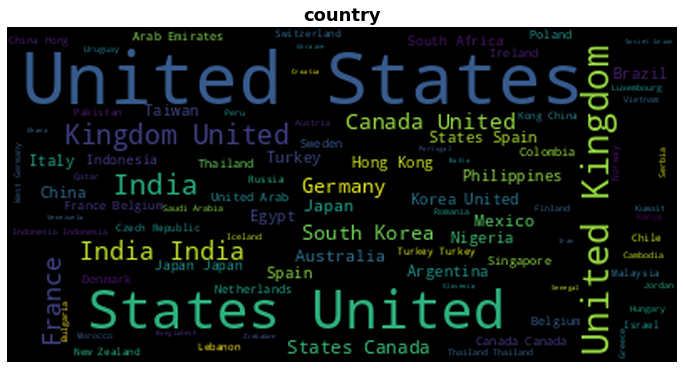

In [ ]:
# Chart - 8 visualization code
features_for_wordplot = ['director', 'description', 'title', 'cast', 'listed_in', 'country']
for i in features_for_wordplot:

  df_word_cloud = netflix_df[i]
  text = " ".join(word for word in df_word_cloud)
  # Create stopword list:
  stopwords = set(STOPWORDS)        #stopwords set is used to remove these common words from the text before generating the word cloud.
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud, interpolation='blackman')
  plt.axis("off")
  plt.title(i, fontsize=18, fontweight='bold')
  plt.show()

##### 1. Why did you pick the specific chart?

We used a word cloud plot to visualize the most frequently occurring words or terms in a given text or dataset. Word clouds are often used to provide a quick and intuitive visualization of the most important or relevant words, which can help identify key themes, topics, or patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

* In Director, the most common Director names are -:
David, Michael, Johns, Daniel, Paul
*In the description, the most commonly used words are:
Find, love, live, live, husband, wife, struggle, help, friends, etc. suggests that movies often revolve around themes of relationships, personal growth, and overcoming obstacles.
*In the cast, the most common actor names are:
Michael, James, David, John, Paul and more.
* Listed_in is the most common genre.
Foreign movies, dramas, action, adventures, foreign movies, etc.
* The most common names in the country are:
USA, India, UK, Japan, Germany, Canada, etc. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*Netflix may use this information to tailor content recommendations based on your location, genre preferences, and popular actors/directors. By understanding which types of movies are most popular in which countries, Netflix can create more localized content and grow its subscriber base.

* Additionally, by identifying the most commonly used keywords in movie descriptions, Netflix can optimize its search algorithms to provide more accurate results and use that information to create more compelling Create movie summaries and encourage users to watch.

* Overall, the insights gained from analyzing the Netflix dataset through the language above can be used by Netflix to make better business decisions and deliver more personalized experiences to users. The result can be increased subscriber satisfaction and revenue. 

#### Chart - 9

In [ ]:
#creating two new df's
tv_shows=netflix_df[netflix_df['type']=='TV Show']
movies=netflix_df[netflix_df['type']=='Movie']

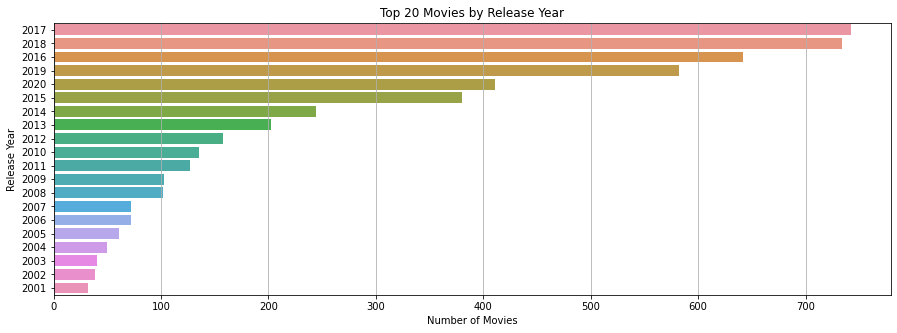

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(15,5))
sns.set_palette('bright')
sns.countplot(y=movies['release_year'],data=netflix_df,order=movies['release_year'].value_counts().index[0:20])
plt.title('Top 20 Movies by Release Year')
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.grid(axis='x')


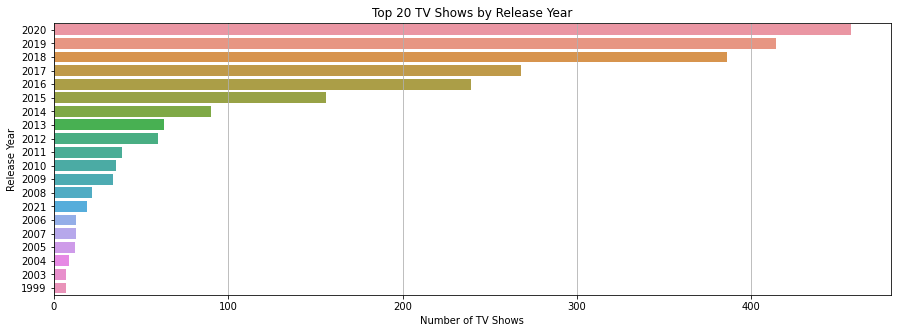

In [ ]:
plt.figure(figsize=(15,5))
sns.set_palette('bright')
sns.countplot(y=tv_shows['release_year'],data=netflix_df,order=tv_shows['release_year'].value_counts().index[0:20])
plt.title('Top 20 TV Shows by Release Year')
plt.xlabel('Number of TV Shows')
plt.ylabel('Release Year')
plt.grid(axis='x')


##### 1. Why did you pick the specific chart?

We used this chart to plot the count of TV shows and movies differently.

##### 2. What is/are the insight(s) found from the chart?

*2018 is the upper limit for the number of videos that can be released/added.
*Maximum number of TV shows released is his 2020 because it is the period of Covid and everyone is staying at home. Netflix is ​​using this opportunity to provide viewers with deals and quality content that will lead to the release of more movies and TV shows.
* Since 2014, the number of movie and TV episodes has increased significantly. 

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
#adding columns of month and year of addition

netflix_df['month'] = pd.DatetimeIndex(netflix_df['date_added']).month
netflix_df.head()


show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  
0  In a future where the elite inhabit an island ...      8  
1  After a devastating earthquake hits Mexico Cit...     12  
2  When an army recruit is found dead, his fellow...     12  
3  In a postapocalyptic world, rag-doll robots hi...     11  
4  A brilliant group of students become card-coun...      1

Text(0.5, 1.0, 'Number of movies releasing according to months')

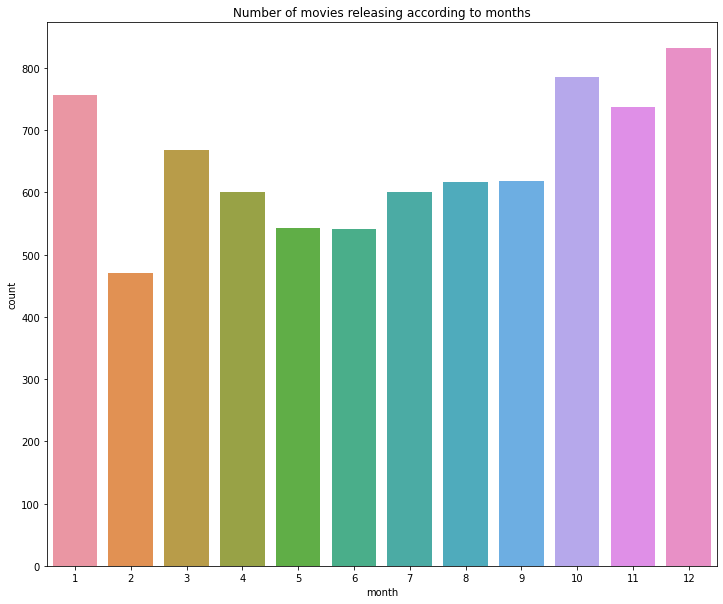

In [ ]:
# Plotting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot(x='month',data=netflix_df)
plt.title('Number of movies releasing according to months')

<Axes: xlabel='month', ylabel='count'>

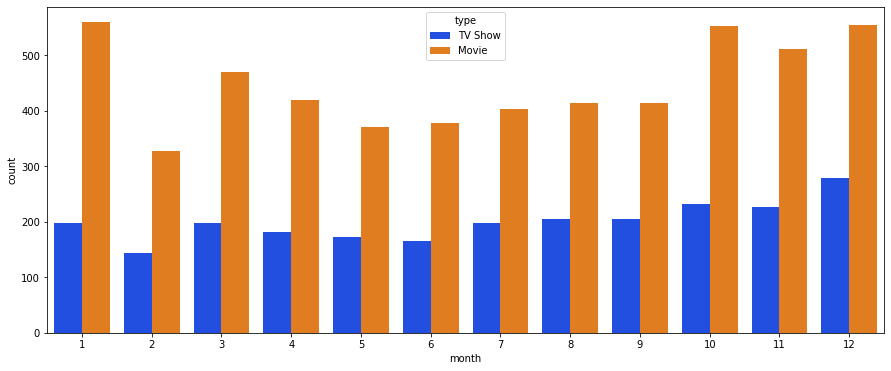

In [ ]:
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
#Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month', hue='type',lw=5, data=netflix_df, ax=ax)

##### 1. Why did you pick the specific chart?

Countplot is used to Show the counts of observations in each categorical bin using bars. We used this specific chart to check the count of TV shows and movies over month. 

##### 2. What is/are the insight(s) found from the chart?

Maximum number of content is released in the month of December followed by january.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be used to promote more targeted marketing strategies in specific months when the release is high. It can help drive more subsriptions to the platform and eventually more revenue.

#### Chart - 11

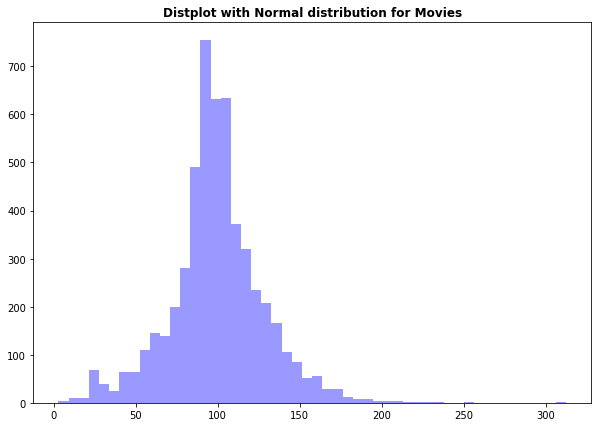

In [ ]:
# Chart - 11 visualization code

#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['blue'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

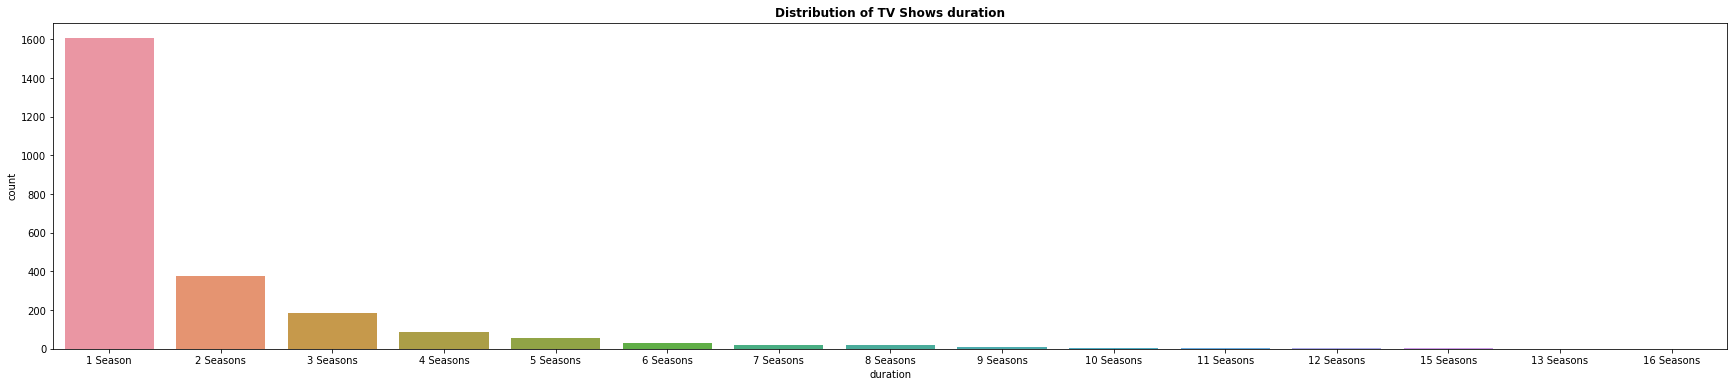

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

To check the distribution of duration feature for movies, and TV shows.

##### 2. What is/are the insight(s) found from the chart?

The variable named duration follow a distribution which is close to normal distribution, while there is highly skewed distribution for TV shows.

#### Chart - 12

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df.head()


show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  
0  In a future where the elite inhabit an island ...      8        2020  
1  After a devastating earthquake hits Mexico Cit...     12        2016  
2  When an army recruit is found dead, his fellow...     12        2018  
3  In a postapocalyptic world, rag-doll robots hi...     11        2017  
4  A brilliant group of students become card-coun...      1        2020

In [ ]:
# All the movies and TV shows in different dataframe
movies = netflix_df[netflix_df['type']=='Movie']
tv_shows= netflix_df[netflix_df['type']=='TV Show']

([<matplotlib.patches.Wedge at 0x7f9909095be0>,
 [Text(-0.8900699117813855, -0.6463555926434588, 'Others'),
  Text(0.9709853583069661, 0.7051151919746822, 'Originals')],
 [Text(-0.48549267915348293, -0.3525575959873411, '69.99%'),
  Text(0.5664081256790635, 0.4113171953185646, '30.01%')])

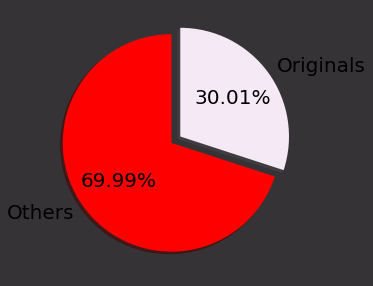

In [ ]:
movies['originals'] = np.where(movies['release_year']==movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)        
#This will make the "Originals" slice of the pie chart stand out a bit from the "Others" slice.
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])
#The autopct parameter specifies that the percentage values should be displayed with 2 decimal places.

##### 1. Why did you pick the specific chart?

We used pie chart, with specifying several parameters to plot the difference between Netflix's original content and other content on the platform.

##### 2. What is/are the insight(s) found from the chart?

Netflix has over 30% original content which shows that netflix invests heavily in creating and promoting their own original content. This can be seen as part of Netflix's strategy to differentiate themselves from other streaming platforms and to maintain a competitive advantage.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*By better understanding the popularity of original content compared to other content on the platform, Netflix may be able to allocate marketing budgets more effectively to promote the most popular content. This improves the overall performance of the platform and helps maintain the subscriber base.

*By promoting original content, Netflix can also increase brand awareness and build a reputation as a provider of quality, innovative content.

*Understanding the popularity of original content on the platform will help Netflix make more informed decisions about content acquisition and retention, marketing, and brand management, ultimately impacting the company's business. can have a positive impact on 

#### Chart - 13

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

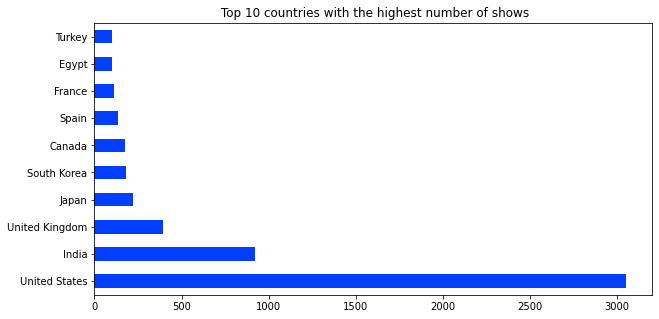

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
netflix_df[~(netflix_df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

Many countries are easier to display and read. As well as Labels for these countries are easier to display without collision

##### 2. What is/are the insight(s) found from the chart?

United states offers highest number movies as well as TV shows out of the top 10 countries as in the dataset

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1.By better understanding the contributions of the countries , netflix may be able to manage their budget issuance.

2.By the ascending contributions of the countries ,netflix can make decisions regarding  acquiring the content,and developing marketing strategies

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Checking the Top entries of netflix_df dataset by using the Head Function 
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  
0  In a future where the elite inhabit an island ...      8        2020  
1  After a devastating earthquake hits Mexico Cit...     12        2016  
2  When an army recruit is found dead, his fellow...     12        2018  
3  In a postapocalyptic world, rag-doll robots hi...     11        2017  
4  A brilliant group of students become card-coun...      1        2020

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['target_ages'] = netflix_df['rating'].replace(ratings)


In [ ]:
# Preparing data for heatmap
netflix_df['count'] = 1
df = netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df = df['country']

df_heatmap = netflix_df.loc[netflix_df['country'].isin(df)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.366071    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008929    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.512626       0.471976  
Kids            0.027322  0.022388        0.093434       0.089479  
Older Kids      0.120219  0.044776        0.204545       0.195346  
Teens           0.382514  0.097015        0.189394       0.243199

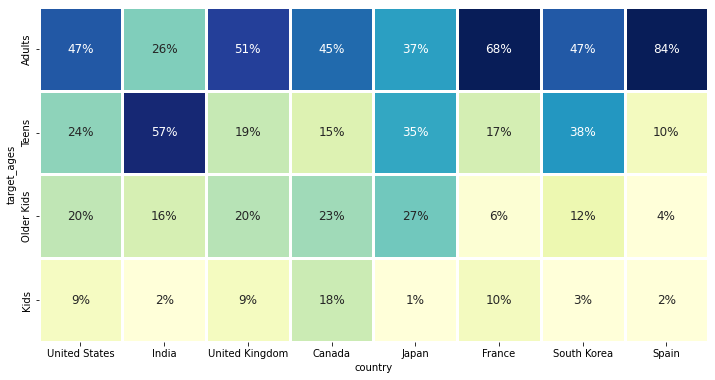

In [ ]:
# Chart - 13 visualization code

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

plt.show()

##### 1. Why did you pick the specific chart?

To  visualize the distribution of the target_ages column across the top 10 countries with the most content on Netflix.

##### 2. What is/are the insight(s) found from the chart?

US and UK are closely aligned with their Netflix target ages, means that people in both USA and UK prefer to watch similar type of content.

In similar way US and Canada are also highly aligned with their Netflix target ages.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at this heatmap, we can gain insights into how the content preferences of viewers in different countries may differ based on their age group, which can help inform content acquisition and localization strategies for Netflix.

#### Chart - 15 - pair plot

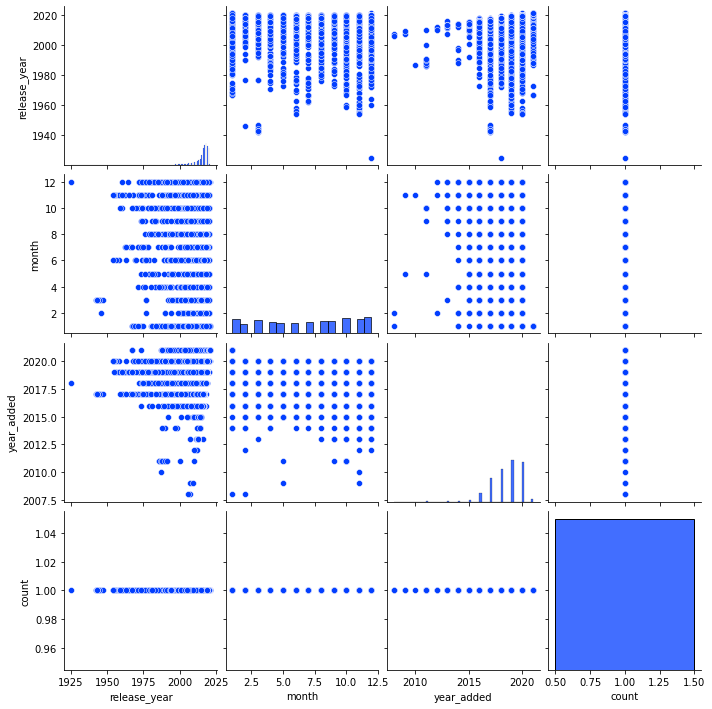

In [ ]:
# Pair Plot visualization code
sns.pairplot(netflix_df)

##### 1. Why did you pick the specific chart?

Pair plot shows the relationship for  combination of variable in a DataFrame as a matrix of plots 

## **Feature Engineering & Data Pre-processing**

### Textual Data Preprocessing

In [ ]:
# Seeing the Null Values and Summing up them 
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month           0
year_added      0
target_ages     0
count           0
dtype: int64

All the null values in our dataset are handled till now.

In [ ]:
# Top  5 entires from Netflix_df dataset by using the head function 
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   
2  When an army recruit is found dead, his fellow...     12        2018   
3  In a postapocalyptic world, rag-doll robots hi...     11        2017   
4  A brilliant group of students become card-coun...      1        2020   

  target_ages  count  
0      Adults      1  
1      Adults      1  
2      Adults      1  
3       Teens      1  
4       Teens      1

In [ ]:
#merging all text column to single text column to work with

netflix_df['organized'] =  netflix_df['description'] + ' ' + netflix_df['listed_in'] + ' ' + netflix_df['target_ages'] + ' ' + netflix_df['country']+ ' ' + netflix_df['cast'] + ' '+ netflix_df['director']


In [ ]:
#filled all the missing value with empty strings
netflix_df['organized'] = netflix_df['organized'].fillna("")

In [ ]:
netflix_df['organized'][2]

"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp. Horror Movies, International Movies Adults Singapore Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim Gilbert Chan"

In [ ]:
#text cleaning
import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))   #to remove all non-alphabetic characters
netflix_df['organized'] = netflix_df['organized'].apply(cleaned)

#### 2. Lower Casing

In [ ]:
# Lower Casing
netflix_df['organized']= netflix_df['organized'].str.lower()

#### 3. Removing Punctuations

In [ ]:
import string

def remove_punctuation(text):
    # Create a translation table to remove punctuation using the string module
    translator = str.maketrans('', '', string.punctuation)
    # Apply the translation table to remove punctuation from the text
    text = text.translate(translator)
    return text

In [ ]:
# Applying the Removing punctuation on "organized" column.
netflix_df['organized'].apply(remove_punctuation)

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead his fellow ...
3       in a postapocalyptic world ragdoll robots hide...
4       a brilliant group of students become cardcount...
                              ...                        
7782    when lebanons civil war deprives zozo of his f...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary south african rapper nasty...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: organized, Length: 7770, dtype: object

#### 4. Removing Stopwords

In [ ]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing Stopwords
def remove_stopwords(text):
    # Tokenizing the text into words
    words = nltk.word_tokenize(text)
    # Removing stopwords from the list of words
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Joining the remaining words back into a single string
    text = ' '.join(words)
    return text


In [ ]:
# Applying the Removing Stopwords on "organized" column.
netflix_df['organized'].apply(remove_stopwords)

0       future elite inhabit island paradise far crowd...
1       devastating earthquake hits mexico city trappe...
2       army recruit found dead fellow soldiers forced...
3       postapocalyptic world ragdoll robots hide fear...
4       brilliant group students become cardcounting e...
                              ...                        
7782    lebanons civil war deprives zozo family hes le...
7783    scrappy poor boy worms way tycoons dysfunction...
7784    documentary south african rapper nasty c hits ...
7785    dessert wizard adriano zumbo looks next willy ...
7786    documentary delves mystique behind bluesrock t...
Name: organized, Length: 7770, dtype: object

#### 5. Text Normalization

In [ ]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [ ]:
def stem_text(text):
    words = nltk.word_tokenize(text)  # tokenizing the text into words
    stemmed_words = [stemmer.stem(word) for word in words]  # applying the Snowball stemmer to each word
    return ' '.join(stemmed_words)  # joining the stemmed words back into a single string

# Apply the stem_text function to a column of a pandas DataFrame, such as a column called 'text'
netflix_df['org_new'] = netflix_df['organized'].apply(stem_text)

In [ ]:
# Adding all these values and newly created column org_new 
netflix_df.org_new

0       in a futur where the elit inhabit an island pa...
1       after a devast earthquak hit mexico citi trap ...
2       when an armi recruit is found dead his fellow ...
3       in a postapocalypt world ragdol robot hide in ...
4       a brilliant group of student becom cardcount e...
                              ...                        
7782    when lebanon civil war depriv zozo of his fami...
7783    a scrappi but poor boy worm his way into a tyc...
7784    in this documentari south african rapper nasti...
7785    dessert wizard adriano zumbo look for the next...
7786    this documentari delv into the mystiqu behind ...
Name: org_new, Length: 7770, dtype: object

In [ ]:
netflix_df.org_new.iloc[0]

'in a futur where the elit inhabit an island paradis far from the crowd slum you get one chanc to join the save from squalor intern tv show tv drama tv scifi fantasi adult brazil joo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi'

Here We used Snowball stemmer because it is a popular choice for stemming in NLP because it supports multiple languages, is accurate and efficient, and can be customized to meet specific needs.

#### 6. Text Vectorization

In [ ]:
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   
2  When an army recruit is found dead, his fellow...     12        2018   
3  In a postapocalyptic world, rag-doll robots hi...     11        2017   
4  A brilliant group of students become card-coun...      1        2020   

  target_ages  count                                          organized  \
0      Adults      1  in a future where the elite inhabit an island ...   
1      Adults      1  after a devastating earthquake hits mexico cit...   
2      Adults      1  when an army recruit is found dead his fellow ...   
3       Teens      1  in a postapocalyptic world ragdoll robots hide...   
4       Teens      1  a brilliant group of students become cardcount...   

                                             org_new  
0  in a futur where the elit inhabit an island pa...  
1  after a devast earthquak hit mexico citi trap ...  
2  when an armi recruit is found dead his fellow ...  
3  in a postapocalypt world ragdol robot hide in ...  
4  a brilliant group of student becom cardcount e...

In [ ]:
# Created a new variable new_df and taking the column title and newly created column org_new 
new_df = netflix_df[['title', 'org_new']]

In [ ]:
# See the top 5 entries from new_df dataset 
new_df.head()

title                                            org_new
0     3%  in a futur where the elit inhabit an island pa...
1   7:19  after a devast earthquak hit mexico citi trap ...
2  23:59  when an armi recruit is found dead his fellow ...
3      9  in a postapocalypt world ragdol robot hide in ...
4     21  a brilliant group of student becom cardcount e...

In [ ]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# using the Tf-IDF vectotizer and taking maximum features = 20000
t_vectorizer = TfidfVectorizer(max_features=20000)

# Fitting and trasforming data of column org_new
X= t_vectorizer.fit_transform(new_df['org_new'])
     

In [ ]:
# Seeing the number of rows and column in X variable by using the shape function 
X.shape

(7770, 20000)

Here we have used Tf-idf vectorization beacause it takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### **Dimensionality Reduction using PCA**

In [ ]:
# Importing the library principal component analysis from SKlearn 
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X.toarray())

PCA()

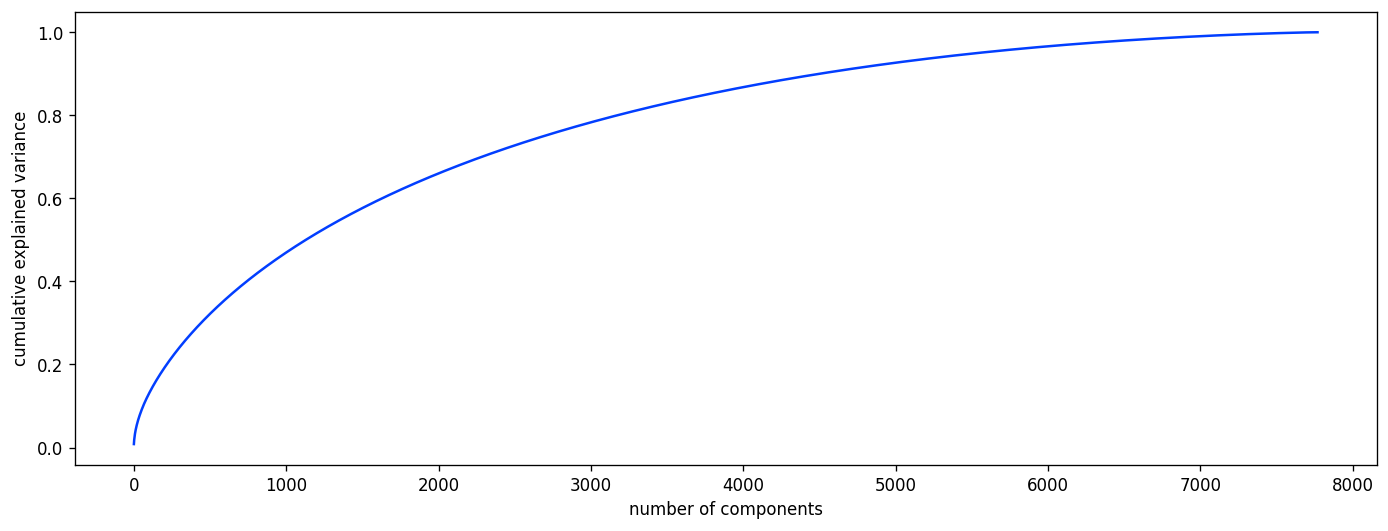

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

* We can see from the above plot almost 95% of the variance can be explained by 5000 components.
* Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5538)

In [ ]:
X_transformed

array([[ 1.15996649e-01, -3.41424552e-02, -3.35917606e-03, ...,
        -1.03733586e-02, -1.64457454e-03, -1.69043091e-03],
       [-4.44042706e-02, -4.09983062e-02,  2.91274232e-02, ...,
         7.33113424e-04, -4.95717098e-03, -2.42023917e-03],
       [-5.73724158e-02, -7.33925059e-02,  6.27926302e-03, ...,
        -1.49424768e-02, -3.11988936e-03, -5.94175177e-03],
       ...,
       [-5.40203474e-02,  1.84797100e-01,  1.17632958e-01, ...,
         6.59513020e-03, -1.35902989e-02, -1.42268468e-03],
       [ 1.04626918e-01,  1.15800069e-02, -1.78140703e-02, ...,
        -3.32700874e-03,  3.48699514e-03,  2.73920066e-04],
       [-3.27585017e-02,  3.80019629e-01,  1.13683798e-01, ...,
        -2.07012430e-03,  3.14158088e-03, -8.09865271e-04]])

Above we have used Principal component analysis which is one of the dimensionality reduction technique. We have used it in order to capture the maximum variance of our data into small number of features.

# **ML Model Implementation**

# **Clustering Analysis**

 ## 1. **Silhoutte Score**

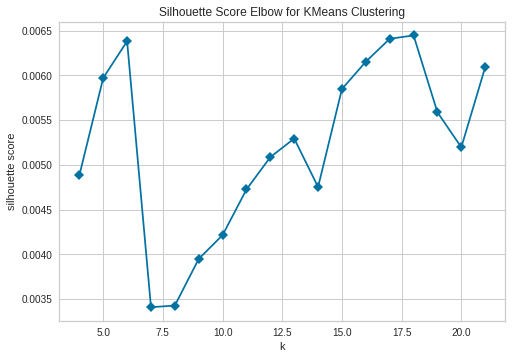

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Importing the library Kmeans from sklearn.cluster 
from sklearn.cluster import KMeans

# import the KElbowVisualizer from yellowbrick.cluster 
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
# importing the library SilhouetteVisualizer from yellowbrick.cluster 
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.0045172633896833556


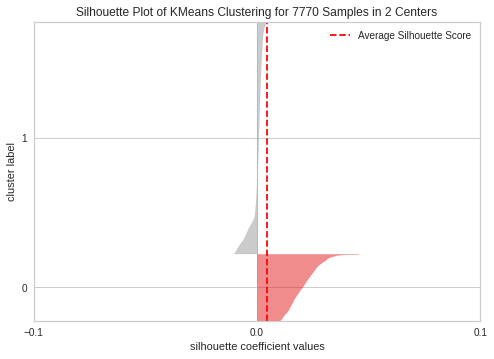

For n_clusters = 3, silhouette score is 0.0038109266448777238


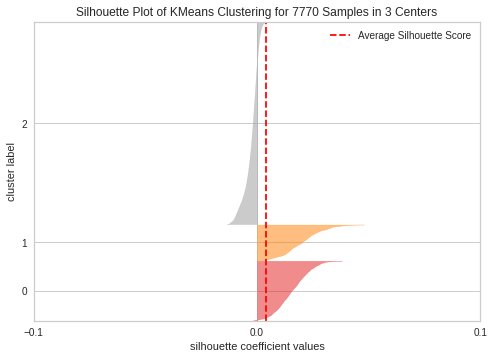

For n_clusters = 4, silhouette score is 0.00488364990301173


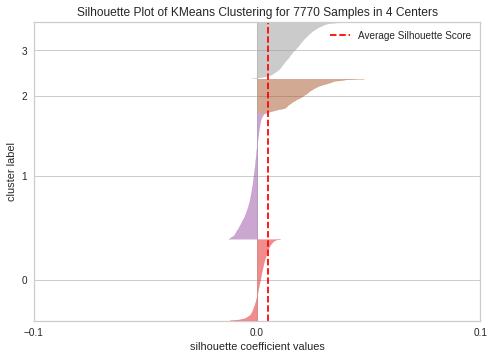

For n_clusters = 5, silhouette score is 0.005971474092150919


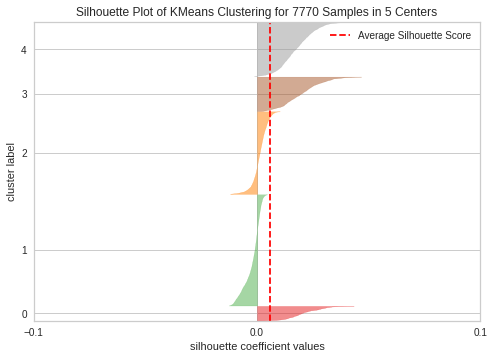

For n_clusters = 6, silhouette score is 0.006381530625764568


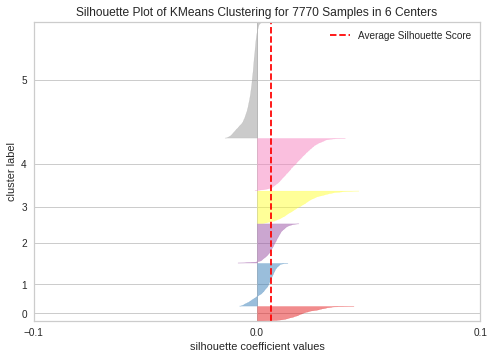

For n_clusters = 7, silhouette score is 0.003409289505093902


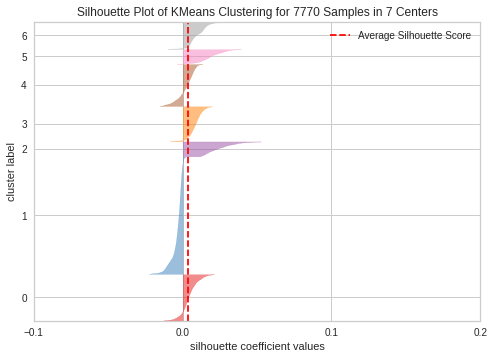

For n_clusters = 8, silhouette score is 0.003427902886816034


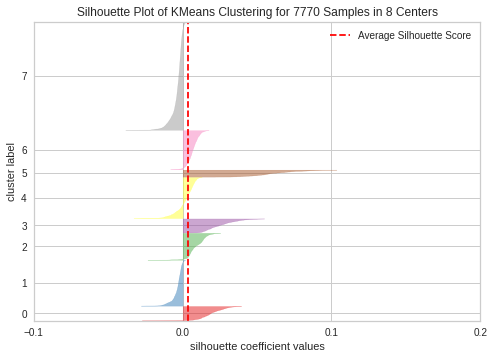

For n_clusters = 9, silhouette score is 0.0039492273900281665


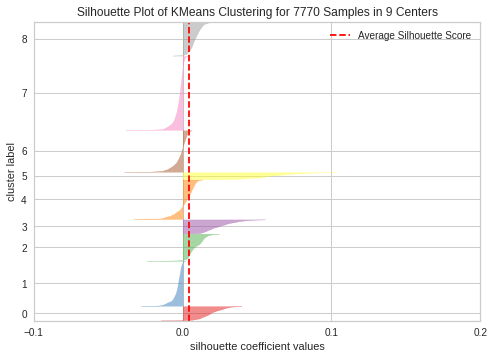

For n_clusters = 10, silhouette score is 0.004215109319345154


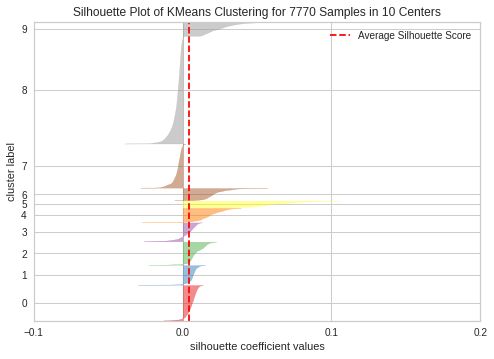

For n_clusters = 11, silhouette score is 0.004725070647007268


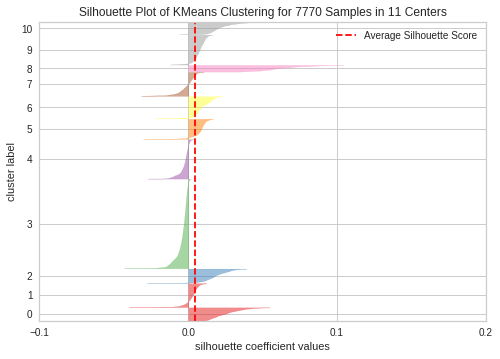

For n_clusters = 12, silhouette score is 0.0050866489644895265


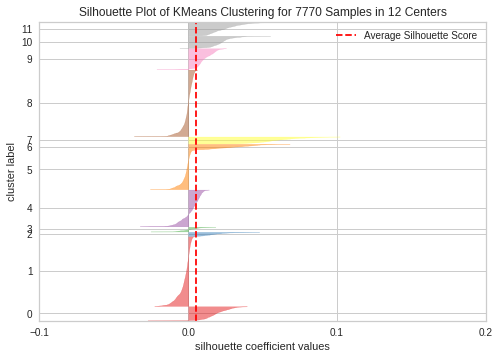

For n_clusters = 13, silhouette score is 0.0052939375670867225


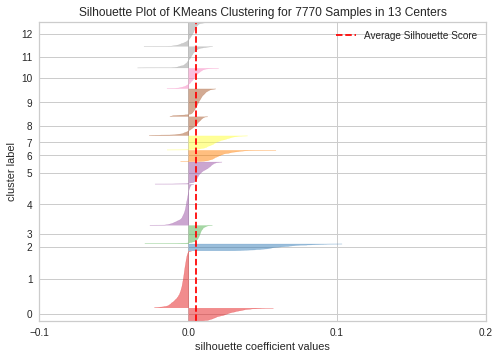

For n_clusters = 14, silhouette score is 0.004752711089744786


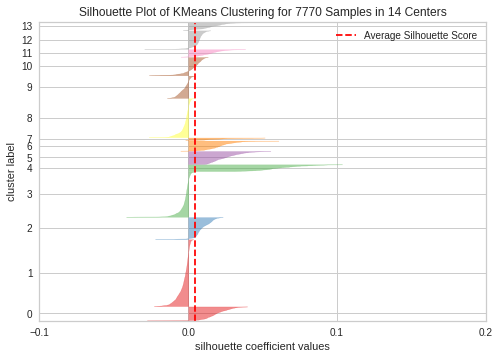

For n_clusters = 15, silhouette score is 0.005847581248579231


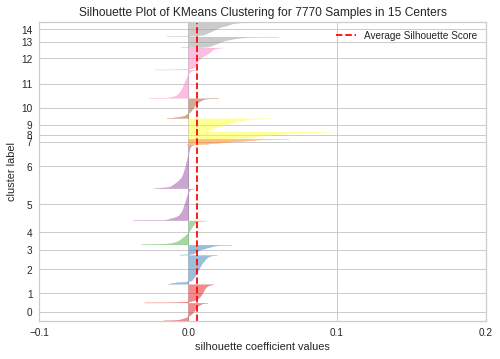

For n_clusters = 16, silhouette score is 0.006152989339923362


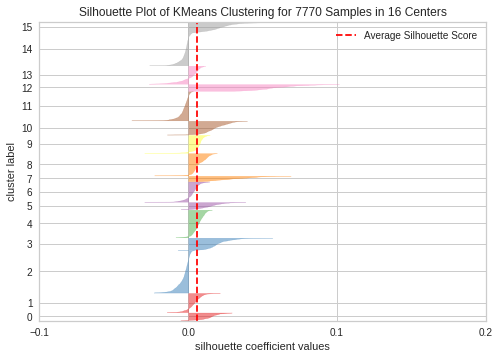

For n_clusters = 17, silhouette score is 0.006408624077399751


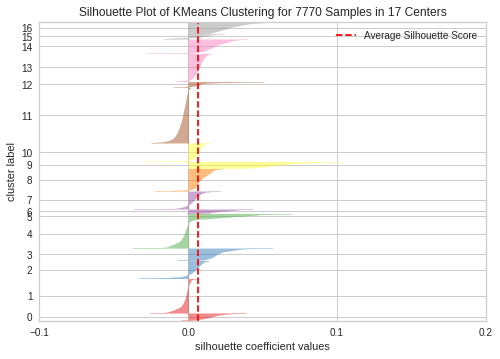

For n_clusters = 18, silhouette score is 0.006446619485199065


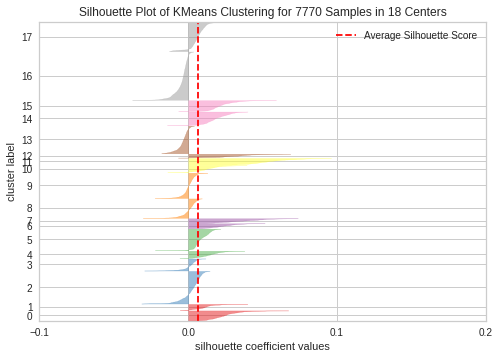

For n_clusters = 19, silhouette score is 0.005587500522651748


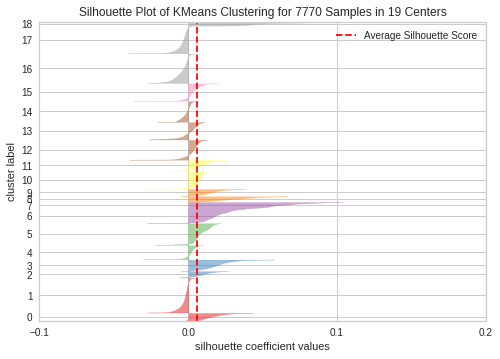

For n_clusters = 20, silhouette score is 0.005196571930486569


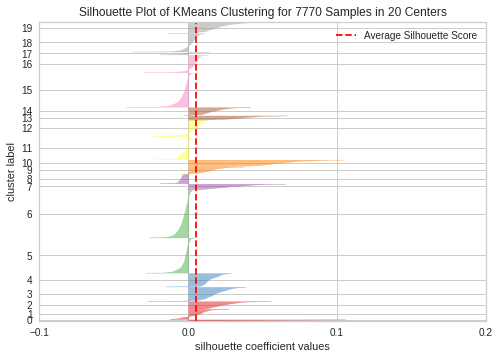

For n_clusters = 21, silhouette score is 0.0060905710509453655


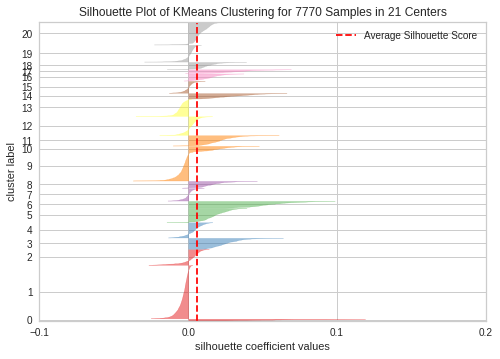

In [ ]:
silhouette_score_analysis(22)

Silhouette score is a metric used to evaluate the quality of clustering results. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A silhouette score ranges from -1 to 1, with higher scores indicating better clustering.

 ## 2.  **Elbow Method**

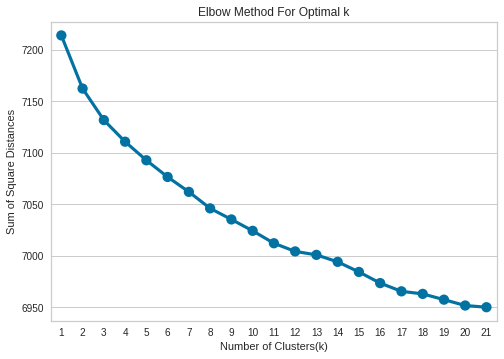

In [ ]:
sum_of_sq_dist = {}
for k in range(1,22):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300, n_init=10, random_state=0)
    km = km.fit(X_transformed)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow method is a common technique used to determine the optimal number of clusters in a data set. This procedure plots the within-cluster sum of squares (WSS) for various numbers of clusters and identifies the "elbow" points on the chart that represent the points at which returns decrease for increasing numbers of clusters. The number of clusters corresponding to low wss scores is chosen here. 

Here we will select the number of clusters as 10, as no drastic difference is visible after that.

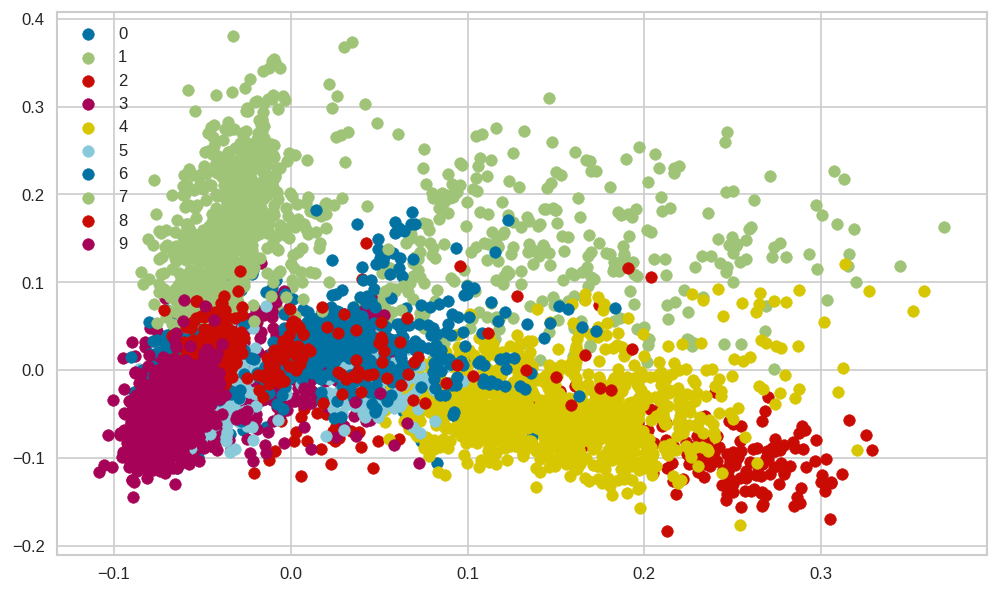

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()
     

In [ ]:
# Add cluster values to the dateframe.
netflix_df['cluster_number'] = kmeans.labels_

We have created a new column called "cluster_number," which indicates which observations are assigned to which cluster.

In [ ]:
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   
2  When an army recruit is found dead, his fellow...     12        2018   
3  In a postapocalyptic world, rag-doll robots hi...     11        2017   
4  A brilliant group of students become card-coun...      1        2020   

  target_ages  count                                          organized  \
0      Adults      1  in a future where the elite inhabit an island ...   
1      Adults      1  after a devastating earthquake hits mexico cit...   
2      Adults      1  when an army recruit is found dead his fellow ...   
3       Teens      1  in a postapocalyptic world ragdoll robots hide...   
4       Teens      1  a brilliant group of students become cardcount...   

                                             org_new  cluster_number  
0  in a futur where the elit inhabit an island pa...               4  
1  after a devast earthquak hit mexico citi trap ...               3  
2  when an armi recruit is found dead his fellow ...               3  
3  in a postapocalypt world ragdol robot hide in ...               5  
4  a brilliant group of student becom cardcount e...               3

In [ ]:
#word cloud for user rating review
def func_select_Category(cluster_label,column_of_choice):
  df_word_cloud = netflix_df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==cluster_label]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='blackman')
  plt.title(f'Cluster: {i}', fontsize=18, fontweight='bold')
  plt.axis("off")
  plt.show()

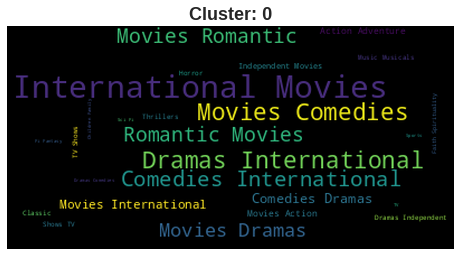

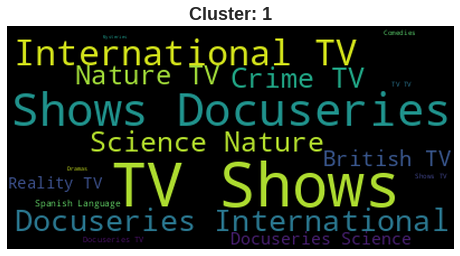

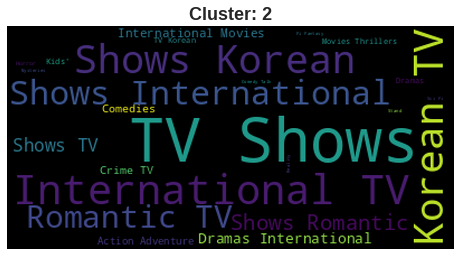

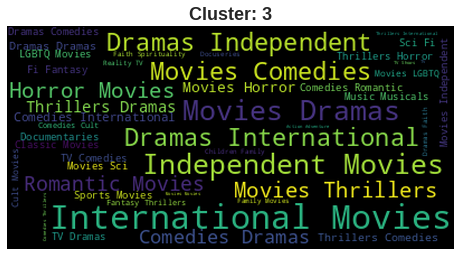

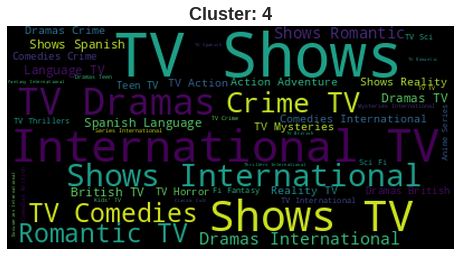

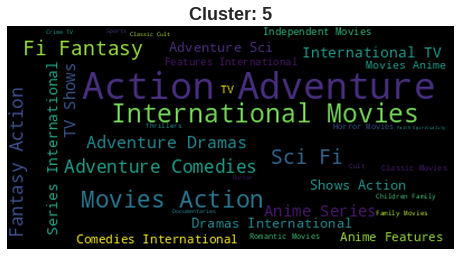

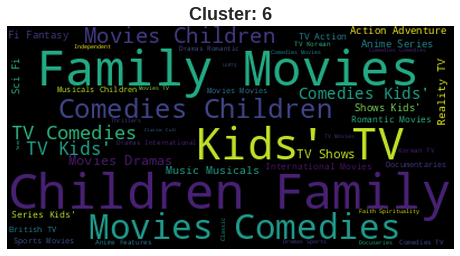

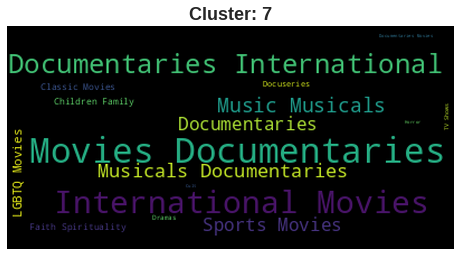

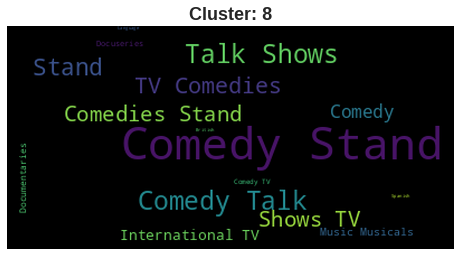

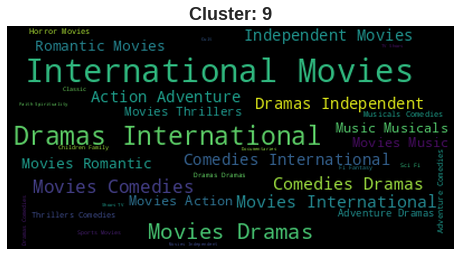

In [ ]:
for i in range(10):
  func_select_Category(i,'listed_in')

* Above we created a word cloud of variables named 'listed_in' in different clusters. We can see that there are different kinds of genres that are dominant in different clusters. for example-:
Cluster 0 covers Comedy and Drama, Cluster 4 TV Shows, Cluster 1 Science and International Films, and Cluster 5 Adventure, Fantasy and Action.

* This clustering is useful for content recommendations.
Clustering can be used to recommend content to viewers based on their preferences. For example, if the viewer prefers scientific or international films, the recommender system can suggest movies from cluster 

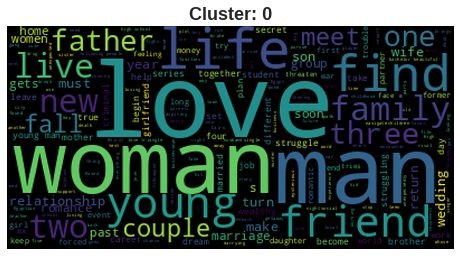

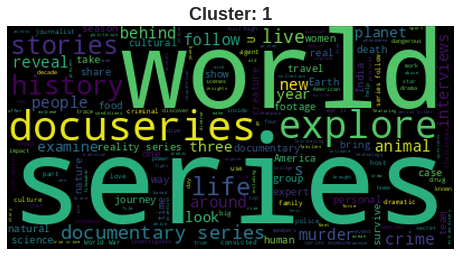

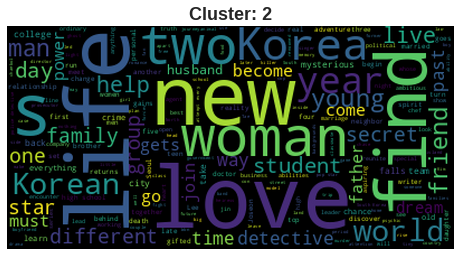

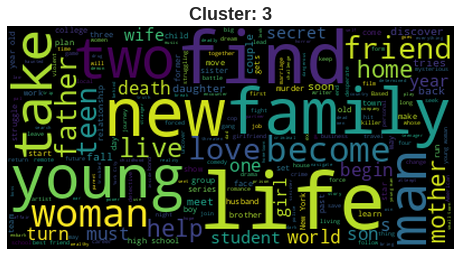

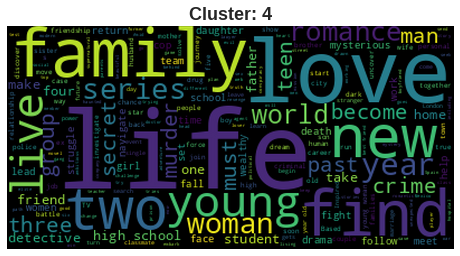

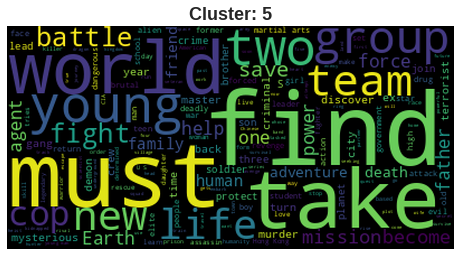

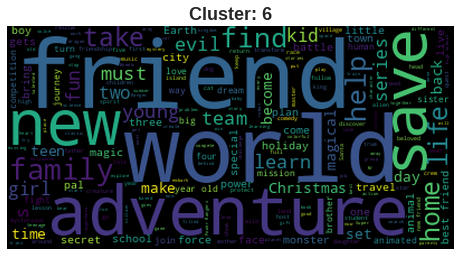

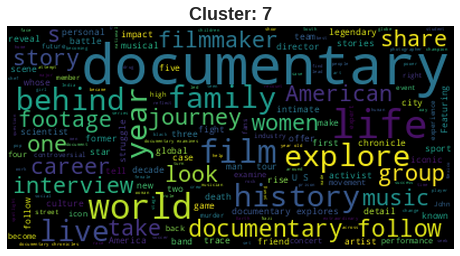

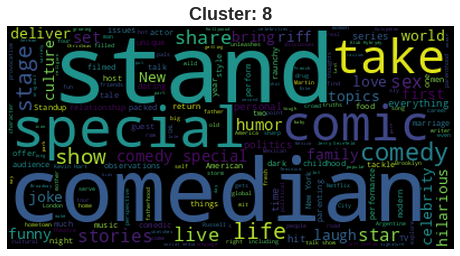

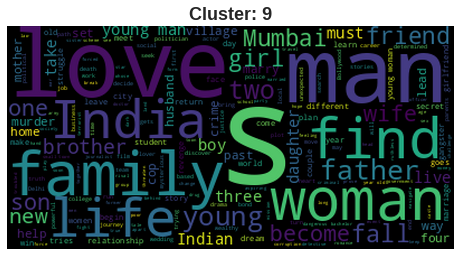

In [ ]:
for i in range(10):
  func_select_Category(i,'description')

## 3. **Dendogram**

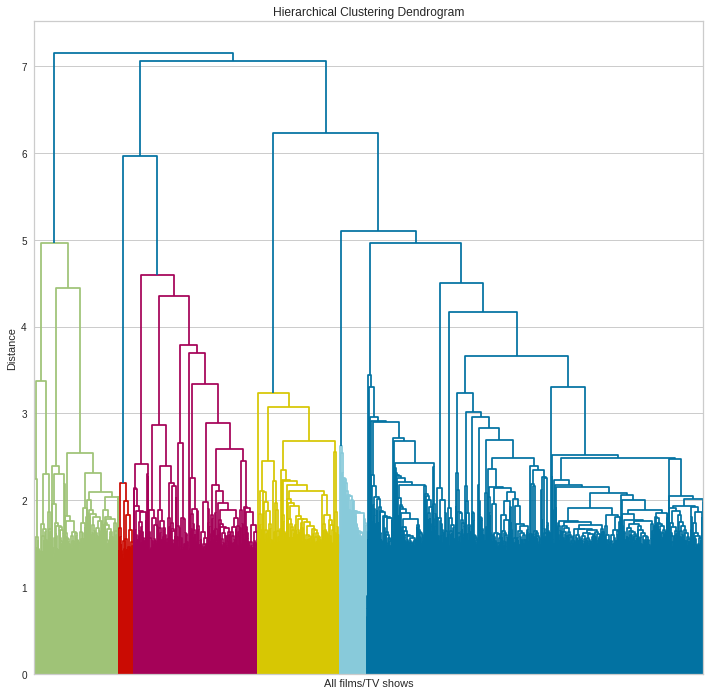

In [ ]:
#import libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(X_transformed,
                            method = 'ward', 
                            metric = 'euclidean')
                      
plt.figure(figsize=(12, 12))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')

dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()

A dendrogram is a tree-like diagram used to display the relationships between data points in a hierarchical clustering algorithm. It displays the distance between each pair of data points and how they are grouped into clusters.

We used Dendrogram because dendrograms are a useful tool for visualizing hierarchical clustering results.

## 4. **Agglomerative Clustering**

In [ ]:
k_range = range(5, 12)  ##Range selected from dendrogram above

In [ ]:
# Compute Silhouette score for each k
from sklearn.cluster import AgglomerativeClustering
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_transformed)
    score = silhouette_score(X, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=5, Silhouette score=0.001577
k=6, Silhouette score=0.002002
k=7, Silhouette score=0.000878
k=8, Silhouette score=0.001343
k=9, Silhouette score=0.001917
k=10, Silhouette score=0.002299
k=11, Silhouette score=0.002145


Here, we have the same number of clusters in k-means elbow method and agglomerative clustering i.e. 10, it means that both methods agreed on the optimal number of clusters for the given data. This might be a good sign that the chosen number of clusters is a good fit for the data.

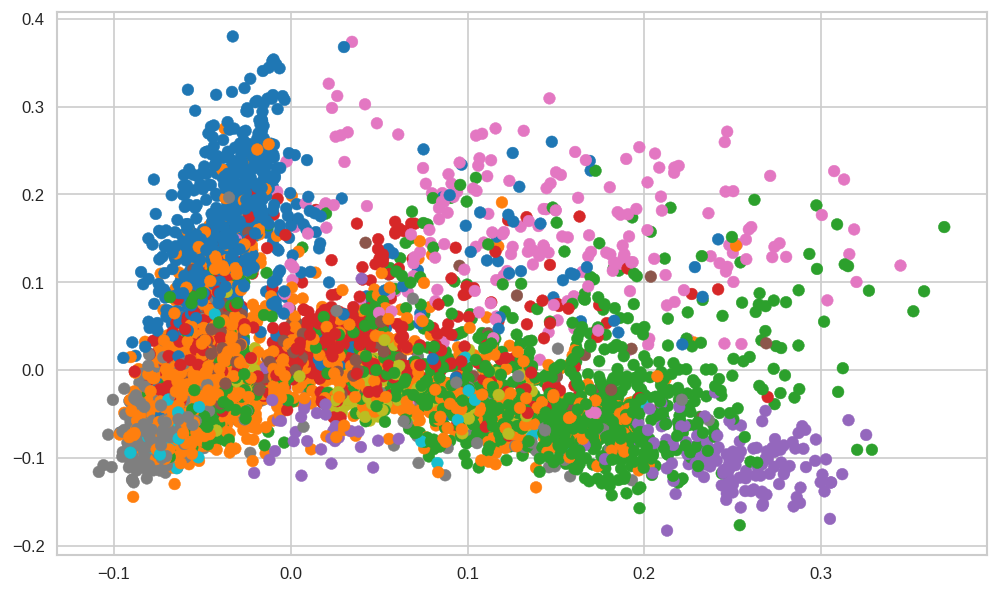

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
labels = model.fit_predict(X_transformed)
# Create a scatter plot with different colors for different clusters
plt.figure(figsize=(10,6), dpi=120)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='tab10')
plt.legend()
plt.show()

In [ ]:
netflix_df['cluster_number_agg_clustering'] = model.labels_

We have created a new column called "cluster_number_agg_clustering," which indicates which observations are assigned to which cluster.

In [ ]:
#word cloud for user rating review
def func_select_Category_agg_clustering(cluster_label,column_of_choice):
  df_word_cloud = netflix_df[['cluster_number_agg_clustering',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number_agg_clustering']==cluster_label]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='blackman')
  plt.title(f'Cluster: {i}', fontsize=18, fontweight='bold')
  plt.axis("off")
  plt.show()

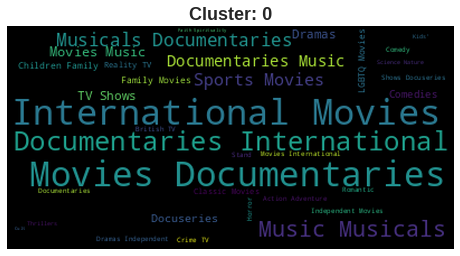

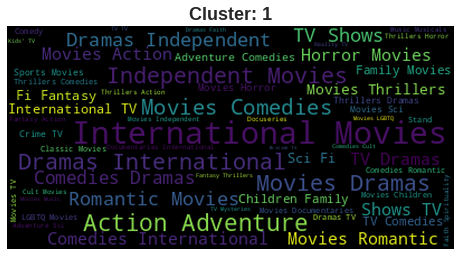

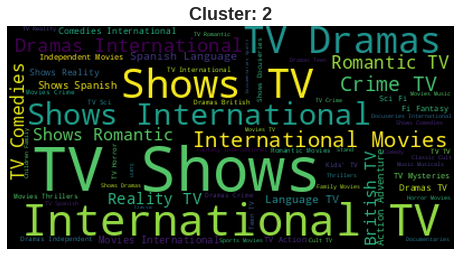

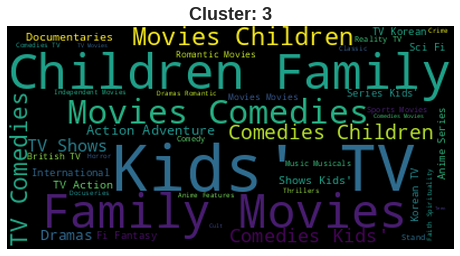

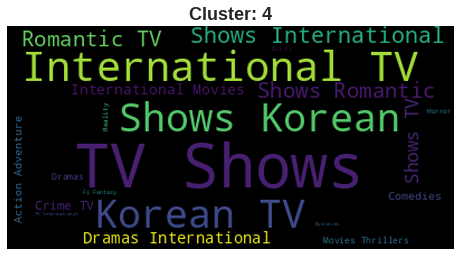

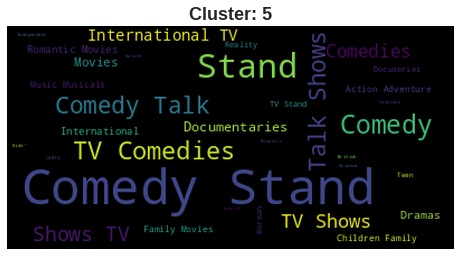

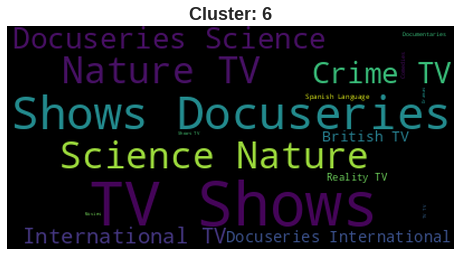

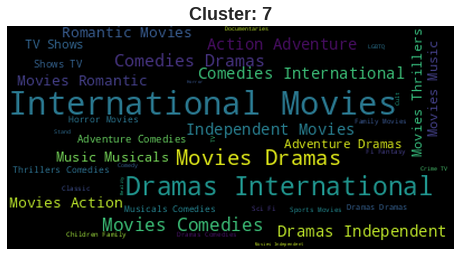

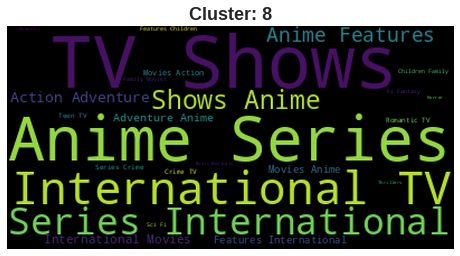

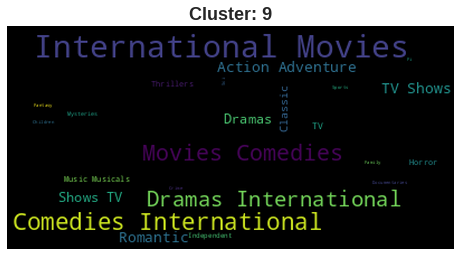

In [ ]:
for i in range(10):
  func_select_Category_agg_clustering(i,'listed_in')

Here again we have created thw word plot for our listed_in variable to check the distribution of words in different clusters. And we can see that 
* Cluster 0 contains maximum no. of documentaries, musical, sports.
* Cluster 1 contains maximum no. of Independent, International, Horror movies.
* Cluster 2 contains max no of TV shows
* Cluster 3 conatins max no. of family, kids movies.
* Cluster 4 contains max no. of Korean, Crime thriller movies.
* Cluster 5 contains max no. of Standup comedy shows.
* Cluster 6 contains max no. of nature and science.]
* Cluster 7 contains max no. of Drama, Comedy and International movies.
* Cluster 8 contains max no. of Anime movies and anime series.
* Cluster 9 contains max no.of action, comedies, dramas and international movies.

## **Content Based Recommender System**

In [ ]:
# Importing the NLTK methord and from that we imported the stopwords function 
import nltk
from nltk.corpus import stopwords

# Importing CountVectorizer, TfidfTransformer, TfidfVectorizer from sklearn library 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_df['org_new'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 41973)

We prefer cosine similarity over tf-idf for the following reasons:

* Cosine similarity handles higher dimensional sparse data better.

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two elements contain similar words but in different orders, cosine similarity will consider them similar, but tf-idf may not. This is because tf-idf only considers the frequency of words in a document, not their order or meaning. 

### **Using Cosine Similarity**

Cosine similarity is a measure of similarity between two nonzero vectors in multidimensional space. Measures the cosine of the angle between two vectors. The range is -1 (opposite direction) to 1 (same direction). 0 indicates orthogonality (vectors are perpendicular to each other).

In this project I used cosine similarity. It is used to determine how similar two documents or texts are. It represents documents as vectors in a high-dimensional space, with each dimension representing a word or term in the corpus. Then you can compute the cosine similarity between the vectors to determine how similar the documents are based on their word usage. 

In [ ]:
# Import cosine_similarity from sklearn.metrics.pairwise
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
programme_list=new_df['title'].to_list()

In [ ]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)         #finds the index of the input title in the programme_list.
    sim_score = list(enumerate(cosine_sim[index])) #creates a list of tuples containing the similarity score and index between the input title and all other programmes in the dataset.
    
    #position 0 is the movie itself, thus exclude
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11]  #sorts the list of tuples by similarity score in descending order.
    recommend_index = [i[0] for i in sim_score]
    rec_movie = new_df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommended movie','Similarity(0-1)'])
    return rec_table
     

This function calculates the cosine similarity scores between the input title and all other titles in the dataset, sorts them in descending order, and returns the top 10 movies with the highest similarity scores as recommendations.

In [ ]:
recommend("Indiana Jones and the Last Crusade")

Recommended movie  Similarity(0-1)
0      Indiana Jones and the Raiders of the Lost Ark           0.3144
1  Indiana Jones and the Kingdom of the Crystal S...           0.1996
2               Indiana Jones and the Temple of Doom           0.1939
3                    Monty Python and the Holy Grail           0.1289
4                                            Lincoln           0.1272
5                                   A Bridge Too Far           0.1219
6                               The Battle of Midway           0.1103
7                                         Pawn Stars           0.1082
8                           The Adventures of Tintin           0.1081
9                                      Patriot Games           0.1021

In [ ]:
recommend('Betaal')

Recommended movie  Similarity(0-1)
0                    Poshter Girl           0.1281
1                    Agent Raghav           0.1198
2             Anjaan: Rural Myths           0.1071
3                   Bard of Blood           0.1007
4  Gunjan Saxena: The Kargil Girl           0.0915
5                     Manusangada           0.0895
6   Fear Files... Har Mod Pe Darr           0.0893
7                Back with the Ex           0.0872
8                    Sacred Games           0.0857
9            Battlefield Recovery           0.0846

In [ ]:
recommend('Zindagi Na Milegi Dobara')

Recommended movie  Similarity(0-1)
0    Luck by Chance           0.2684
1   Dil Dhadakne Do           0.2191
2           Lakshya           0.1780
3              Zero           0.1578
4    Bombay Talkies           0.1572
5             Dev.D           0.1537
6             Don 2           0.1532
7     Ghost Stories           0.1465
8          Shanghai           0.1449
9           Waiting           0.1438

In [ ]:
recommend('Iron Man: Armored Adventures')

Recommended movie  Similarity(0-1)
0                                           LoliRock           0.1272
1                LEGO Jurassic World: Secret Exhibit           0.1257
2                NOVA: Secrets of the Shining Knight           0.1190
3       Strawberry Shortcake: Berry Bitty Adventures           0.1168
4             Little Baby Bum: Nursery Rhyme Friends           0.1092
5            Marvel's Iron Man & Hulk: Heroes United           0.1092
6                             Kong: King of the Apes           0.1048
7                                         The Hollow           0.1009
8                               The Umbrella Academy           0.1006
9  Learning Songs by Little Baby Bum: Nursery Rhy...           0.1003

In [ ]:
recommend('Shootout at Lokhandwala')

Recommended movie  Similarity(0-1)
0  Mission Istaanbul: Darr Ke Aagey Jeet Hai           0.2818
1                           Kyun! Ho Gaya Na           0.2312
2                     Kabhi Alvida Naa Kehna           0.1627
3                              Hello Brother           0.1618
4                                     Kisaan           0.1578
5                                     Lagaan           0.1534
6                             Action Replayy           0.1504
7                                        Dum           0.1464
8                            Mumbai Cha Raja           0.1459
9                            Golmaal Returns           0.1409

In [ ]:
# save the function as a pickle file
import pickle
with open('recommend.pkl', 'wb') as f:
    pickle.dump(recommend, f)

In [ ]:
import pickle
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [ ]:
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

# **Conclusion**

1. The purpose of this project was to study how to group different movies and TV shows on Netflix based on characteristics such as genre, director, and rating.


2. To do this, I started with data wrangling, null value handling, and exploratory data analysis. Some of the key insights from exploratory data analysis are:

* More movies than TV shows are observed in our dataset. * However, in recent years, Netflix has focused more on TV shows.
* Most of the content rated on Netflix falls into the TV-MA (indicating adult content is more popular on Netflix) and TV-14 categories.
*The number of TV shows and movies on Netflix has increased significantly since 2010.
* Documentaries, stand-up comedies, dramas, international films and comedies are some of the most popular content on the platform. The reason is that people use the Ott platform as an entertainment source and often prefer content that feels more relevant and real to their lives. * The United States and India are the leading countries producing content through the platform.
* Maximum content will be released or added to the platform between 2017 and 2019.
*Maximum amount of content will be released in December and January.
*Netflix has over 30% original content, demonstrating that Netflix invests heavily in creating and promoting its own original content.
* The US and UK are closely aligned on Netflix's target age. this means that people in both the US and UK like similar types of content. 
3. We then applied some preprocessing of the text data, including several steps such as:

* Combine all important columns into one column.
* lowercase
* remove punctuation
*Remove stopwords
* Text normalization (stemming and rematization)
* vectorize text (using tfidf)


4. Due to the large number of features after tfidf vectorization, we were able to apply the PCA dimensionality reduction technique to capture 95% of the variance of the 5000 components.


5. Then, in the clustering part, we used several clustering methods such as silhouette score, k-means clustering, dendrogram, and agglomerative clustering.
After analyzing the clustering analysis results, we determined that 10 clusters was the optimal number of clusters.


6. We also created different word charts to visualize the distribution of genres and words across different clusters.

7. Finally, we created a cosine similarity recommendation system on the tfidf matrix.
 8. I then tested the recommendation system with different movie names and it worked fine. 

## **Future Scope**

*Incorporating external datasets such as IMDB ratings and Rotten Tomatoes into this dataset can lead to many interesting discoveries.

* More time can be spent on clustering analysis to try different clustering algorithms such as DBSCAN.

* More time can be spent improving the recommendation system and creating apps that work on top of it. 